# **Kaggle Survey - Data Analysis Report**
***

**Mhamed Jabri — 11/15/2017**

*'So what's Data Science anyway ?'*, *'What languages do you guys use most?'*, *'What's the most valuable technical skills for a Data Scientist '* and maybe the hardest one *'What does a Data Scientist specifically do at work'*. In my (very long and entertaining, thankfully) quest to becoming a data scientist, I've been asked some straightforward and basic questions and still, I found it hard to give a proper answer. 

According to Glassdoor, 'Data Scientist' is the best job in America for the second year in a row while a new study by CareerCast.com revealed data scientist jobs have the best growth potential over the next seven year. Clearly, Data Science is THE hype, the real deal. Yet, it remains somewhat hard to set boundaries and axioms for Data Science, indeed, while we can say something like 'Being good at  probabilities and stochastic processes guarantees success as a QR' (sorry fellow financial engineers), there's no equivalent for Data Science, at least in my opinion.

This Kaggle survey aims to dig deeper and understand how data science is perceived through expert data scientists and aspiring data scientists using this wonderful platform. The data that we've been given will help us understand what platforms people use to learn data science, what's the most valuable skill in data science, what data scientists are looking for when they're job hunting, what programming language is most frequently used and a lot more.

In the following, not only will you get the answer to nearly any question related to Data Science, **you'll also be able to predict your salary as a data scientist given some very basic properties (see section 3.6 for the machine learning stuff) !!**

Let's now embark on a journey of Data Science discovery. Enjoy the ride !

# Table of contents
***

* [About the survey](#introduction)
* [1. Demographic analysis](#demographics)
   * [1.1. Gender, Age and Country](#general)
   * [1.2. Formal education and Major](#education)
   * [1.3. First encounter with Data Science](#firsttime)
   * [1.4. Employment status](#prolife)
   * [1.5. Career plan and Motivation for using Kaggle](#switchers)
* [2. Python Vs. R](#language)
    * [2.1. Use across the world (interactive Tableau visualization)](#countryuse)
    * [2.2. Use at the workplace : Algorithms, methods, type of data ...](#skills)
    * [2.3. Industry and  Job title : Correlation to Major](#industry)
    * [2.4. Main function and percentage of time devoted to specific tasks](#tasks)
    * [2.5. Experience as code writers](#tenure)
    * [2.6. Which language would you recommend for beginners](#learnfirst)
* [3. US working Kagglers : Annual income analysis](#salary)
    * [3.1. Annual income for US citizens](#us_salary)
    * [3.2. Income by gender](#gender_salary)
    * [3.3. Income by Academic degrees](#education_salary)
    * [3.4. Income by job titles](#jobtitle_salary)
    * [3.5. Dimensionality reduction and 2D-plotting (MCA)](#mca)
    * [3.6. Let's do some Machine Learning : Income Prediction](#prediction)
* [4. Kaggle's learners community](#learners)
    * [4.1. Demographic properties of learners community](#demographic)
    * [4.2. Most used platforms for learning Data Science and their usefulness](#platforms)
    * [4.3. What next ? ML Method / Tool](#platforms)
    * [4.4. Time spent during Data Science learning](#time_learning)
    * [4.5. Most important skills for landing a job in Data Science](#skills_job)
    * [4.6. Learners' job hunting](#job_hunt)
* [Conclusion](#conclusion)


## About the survey 
<a id="introduction"></a> 
***

There were 16 716 Kaggle respondents to this survey. The questions covered a broad spectrum, starting with general demographic questions before moving on to specific DS/ML questions for both the working community and the learning one.

Five files come with this survey : 

-**multipleChoiceResponses.csv ** : Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.         
-**freeformResponses.csv** : Each time a respondent selected 'Other' and filled the 'Please specify' part, his answer was added in the freeform.            
-**schema.csv** : This file includes all the questions that have been asked, explains each one of them and precise to whom they've been asked (learners, coders...).             
-**RespondentTypeREADME.txt ** : This is to understand how instances are being defined by Kaggle : who are the learners, who are the workers, who are the the coding workers.                   
-**conversionRates.csv** : Currency conversion rates to USD. 

The most important file is **multipleChoiceResponses.csv **, which contain most of the informations that will be needed. 
**RespondentTypeREADME.txt ** is necessary when you want to understand the behaviour of a specific community of kagglers and **schema.csv** helps understanding the questions.

Let us load those files.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import operator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

RespondentTypeREADME.txt
conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



In [2]:
cvRates = pd.read_csv('../input/conversionRates.csv', encoding="ISO-8859-1")
freeForm = pd.read_csv('../input/freeformResponses.csv', encoding="ISO-8859-1")
data = pd.read_csv('../input/multipleChoiceResponses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('../input/schema.csv', encoding="ISO-8859-1")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.



We shall now begin the analysis, first comes the demographic overview.

## 1. Tell me  about yourself
<a id="demographics"></a>
***

<img src="https://media.giphy.com/media/12WawXb61sDRMA/giphy.gif"/>

We'll start with a general overview of the demographic properties.
> EDIT : Credits to @sowhit for pointing out that the barplots could have better readability when the bars are ordered.

### Gender, age and country
<a id="general"></a>

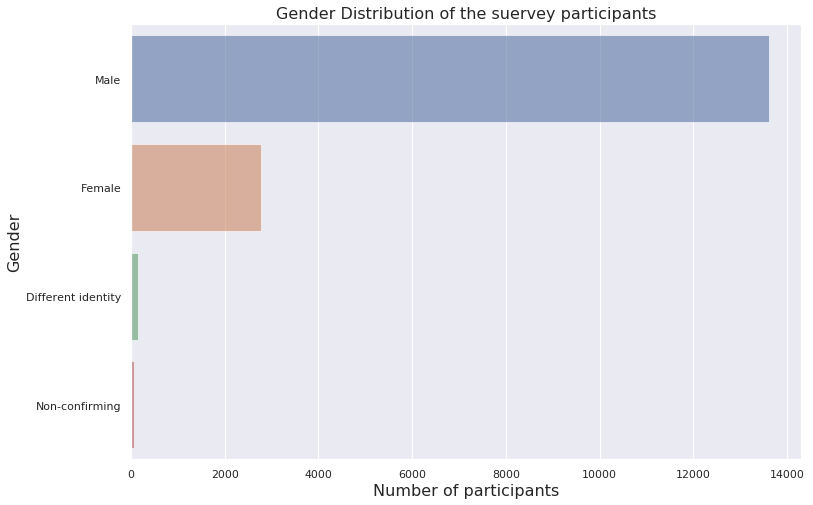

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [3]:
plt.figure(figsize=(12,8))
genders = data['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.6)
plt.yticks(range(len(data['GenderSelect'].value_counts().index)), ['Male', 'Female','Different identity','Non-confirming'])
plt.title("Gender Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();
print('Proportion of women in this survey: {:0.2f}% '.format(100*len(data[data['GenderSelect']=='Female'])/len(data['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(data[data['GenderSelect']=='Male'])/len(data['GenderSelect'].dropna())))


Ouch ! The gender gap is huge! Unfortunately, this is common in the tech industry. Statistics show that** women hold only 25% of computing jobs**, which is already low but what we're having here is worse. 16.71% is too low, **there's 5 times as many male respondents as female respondents.**

In [4]:
print('{} instances seem to be too old (>65 years old)'.format(len(data[data['Age']>65])))
print('{} instances seem to be too young (<15 years old)'.format(len(data[data['Age']<15])))

154 instances seem to be too old (>65 years old)
35 instances seem to be too young (<15 years old)


Instances with 0, 5, 100 years old don't make much sens. Removing those instances here (we'll keep them later on as the age doesn't affect the other properties) would yield more significant results.

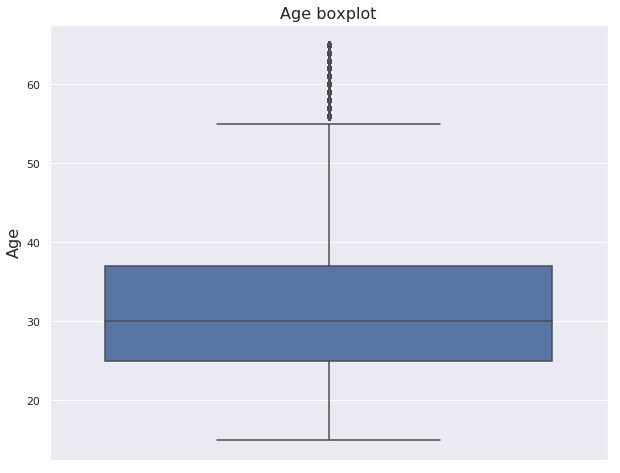

In [5]:
age=data[(data['Age']>=15) & (data['Age']<=65) ]
plt.figure(figsize=(10,8))
sns.boxplot( y=age['Age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show();


The age median is about 30 years old and most participants are between 25 and 37 years old.

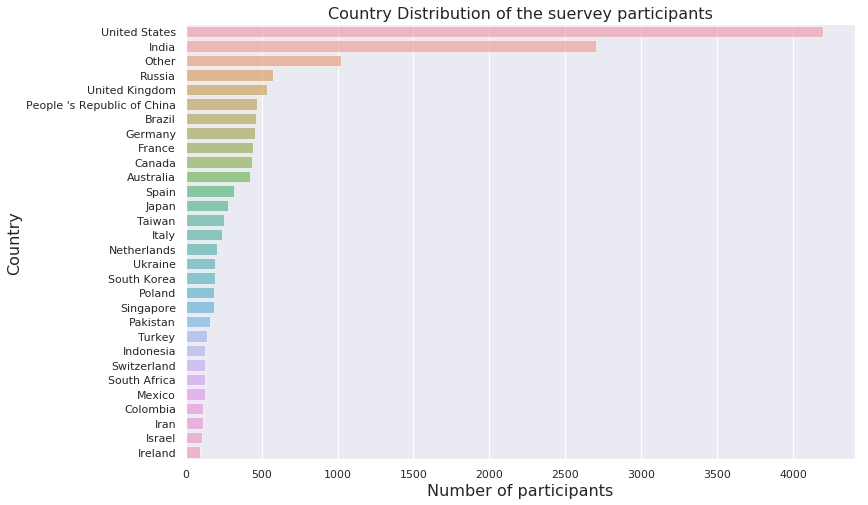

In [6]:
plt.figure(figsize=(12,8))
countries = data['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Country Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show();

Seems like most Kagglers are either Americans or Indians. More precisely,

In [7]:
print('{:0.2f}% of the instances are Americans'.format(100*len(data[data['Country']=='United States'])/len(data)))
print('{:0.2f}% of the instances are Indians'.format(100*len(data[data['Country']=='India'])/len(data)))

25.11% of the instances are Americans
16.18% of the instances are Indians


All in all, 41.29% of the total instances are either from the US or India. This is sort of expected because those are the two most active communities around the world in Data Science (thanks to Kaggle and Analytics Vidhya).

### Formal education and Major
<a name="id"></a>

In [8]:
edu = data['FormalEducation'].value_counts()
labels = (np.array(edu.index))

values = (np.array((edu / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=False)

layout = go.Layout(
    title='Formal Education of the survey participants'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Formal_Education")


Nearly half of the kagglers who took this survey are Master's graduates, impressive.   
What's more, 80.34% of respondents hold at least a bachelor degree. 

In [9]:
data['MajorSelect']=data['MajorSelect'].replace(to_replace ='Information technology, networking, or system administration',
                                                       value = 'Information tech / System admin', axis=0)

TypeError: replace() got an unexpected keyword argument 'axis'

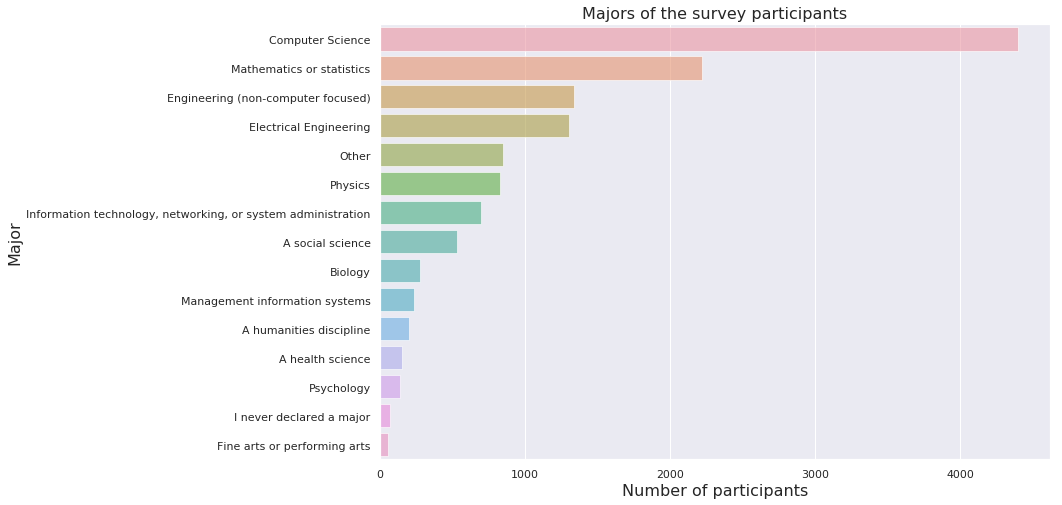

In [10]:
plt.figure(figsize=(12,8))
majors = data['MajorSelect'].value_counts()
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("Majors of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Major", fontsize=16)
plt.show();

Okay I got to admit, this took me by surprise. I expected that a lot more people would have Mathematics as their Major but I was wrong. Computer Science majoring instances are twice as many as the Mathematics ones.     
I also expected Physics to be higher than Electrical Engineering but I was proved wrong on this one too by a quite far margin.
> EDIT : I did some research and found that actually that often, the entire program's name is 'Electrigal Engineering and Computer Science' so that explains the resulsts here.' I wasn't aware of that as in France the two programs are always separated !

### How did you start learning Data Science ? 
<a id="firsttime"></a> 

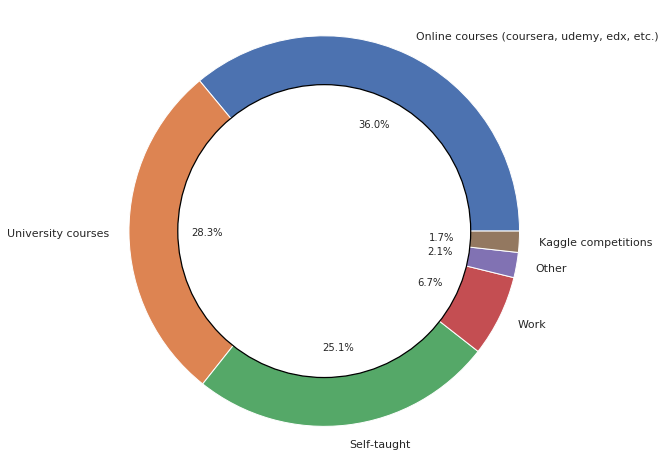

In [11]:
plt.figure(figsize=(10,8))

temp=data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show();


The most popular way to start learning Data Science / Machine Learning is Online Courses. In fact, I was expecting those results because anytime I ask someone *'Please where can I learn X efficiently'* (where X is related to Machine Learning), I end up with a MOOC recommendation.   
Kaggle has a very small proportion but that's natural, people usually come to kaggle to complete their learning once they've got the basics.

Personally, I started learning data science both at university and with online courses at the same time. Then, couple of months later, I discovered Kaggle and its kernels quickly became my favourite learning tool. So I perfectly identify with the results to this question ! 

> To plot basic donut pies such as the one above, here's a [nice and brief tutorial](http:///medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b) !

### Employment status
<a id="prolife"></a>

In [12]:
data['EmploymentStatus']=data['EmploymentStatus'].replace(to_replace ='Independent contractor, freelancer, or self-employed',
                                                       value = 'Independent', axis=0)

TypeError: replace() got an unexpected keyword argument 'axis'

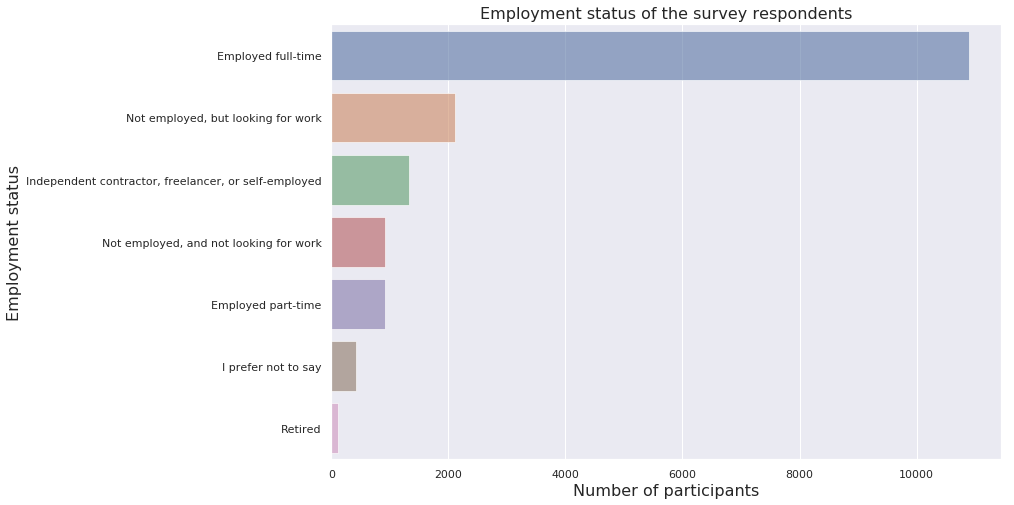

In [13]:
plt.figure(figsize=(12,8))
status = data['EmploymentStatus'].value_counts()
sns.barplot(y=status.index, x=status.values, alpha=0.6)
plt.title("Employment status of the survey respondents", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Employment status", fontsize=16)
plt.show();

In [14]:
print('{:0.2f}% of the instances are employed full-time'.format(100*len(data[data['EmploymentStatus']=='Employed full-time'])/len(data)))
status=['Employed full-time','Independent','Employed part-time']
print('{:0.2f}% of the instances are employed'.format(100*len(data[data.EmploymentStatus.isin(status)])/len(data)))

65.19% of the instances are employed full-time
70.67% of the instances are employed


The overwhelming majority of all participants are employed and as you can notice, most of them are employed full-time.
Still, I thought I would find more freelancers independent workers given the fact that several companies hire private data scientits consultants and the fact that some data scientists dedicate a lot of their time to Kaggle competitions.

### Would you like to work in Data Science ?
<a id="switchers"></a> 

An interesting question was asked to kagglers in this survey : 'Are you actively looking to switch careers to data science?'.
Only 3012 respondents answered this question. My guess is that the other respondents are either already working as data scientists, in which case Yes/No would have no sens, or are still students.

In [15]:
car = data['CareerSwitcher'].value_counts()
labels = (np.array(car.index))
proportions = (np.array((car / car.sum())*100))
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=labels, values=proportions,
              hoverinfo='lbal+percent',
              marker = dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(
    title='Working people looking to switch careers to data science'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Career_Switcher")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of pie
        Received value: 'lbal+percent'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'value', 'percent', 'name'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

Without surprise, most of working kagglers who aren't yet working as data scientists would love to switch careers !
That being said, some of them don't which raises the question of the motive of using Kaggle for people who wouldn't want to work in Data Science.    
This question was included in the survey and it's one of the very few questions that only came as a free form question, i.e choices were not given.     
In the following, we're going to see which words were the most often used by non-switchers who answered this question. The following words *['data', 'science', 'mining', 'big', 'bigdata', 'machine', 'learning']* are deliberately plotted in shades of green.    
Let's see what we've got ! 
> EDIT : Credits to @Chris Crawford who inspired me with his very nice goose-shaped WordCloud that you can check [here](http://www.kaggle.com/crawford/analyzing-the-analyzers).

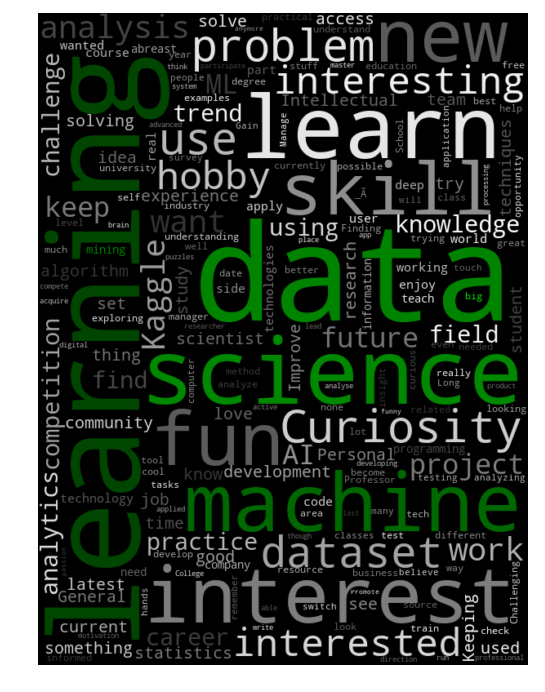

In [16]:
from wordcloud import (WordCloud, get_single_color_func)

#PS : Credits to Andreas Mueller, creator of wordcloud, for the following code of the class 'GroupedColorFunc'.
#He made the code fully public for people who want to use specific color for specific words and made an example.
#Source link : https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html#sphx-glr-auto-examples-colored-by-group-py

class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


#############################################################
# Get text data from the freeform
text = freeForm[pd.notnull(freeForm["KaggleMotivationFreeForm"])]["KaggleMotivationFreeForm"]

wc = WordCloud(collocations=False,height=800, width=600,  relative_scaling=0.2,random_state=74364).generate(" ".join(text))

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['data', 'science', 'mining', 'big',
                'bigdata', 'machine', 'learning']
}

# Words that are not in any of the color_to_words values will be colored with grey
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");


Without suprise, the chosen key words in green are among the most used in the answers that were given. Let's see how all of the words are linked : 
* **Curiosity and interest (and interesting) ** were frequently used, it suggests that some answers were 'Interest towards machine learning' for example.
* **hobby and fun** were also frequently used, it suggests that some people practice data science and participate in competitions as a hobby, to have fun, not because they want to work in that field.
* **challenge, project and competition** were popular too, and yeah kaggle is a pretty great platform for fierce competitors looking for challenging subjects :)

Okay so we've pretty much covered all the demographic features of the dataset (except the income, but an extended analysis is dedicated to that below),  we can move on to the second part which tries to answer the following question :

**How do Python and R fare in Data Science ?**


## 2. Python Vs R : Let the battle begin ! 
<a id="PythonVsR"></a>
***

*'What do you use for data science stuff, R or Python ?'* must be the question we all got more than once as aspiring data scientists. Couple of months ago, polls suggested that Python has definitely overtaken R and became the leader language for Data Science.
This survey will allow us to dig deeper and understand 
We shall now begin ! 

<img src="https://i.imgur.com/sIpzGMl.gif"/>

First, we must identify R and Python users amongst the instances.       
We'll only look at **working people (coding workers) ** who are defined as such : *Respondents who indicated that they were "Employed full-time" or "Employed part-time" AND that they write code to analyze data in their current job.*     

There was a question about frequency use of Python and R, frequencies ranging from 'Rare' to 'Most of the time'.
- Users who use Python Most of the time / often and don't use R just as much will be considered Python Users.
- Users who use R Most of the time / often and don't use Python just as much will be considered R users.
- Users who use both R and Python equally and at least often will be categorized as 'Both'.

In [17]:
t2=data[["WorkToolsFrequencyR","WorkToolsFrequencyPython"]].fillna(0)
t2.replace(to_replace=['Rarely','Sometimes','Often','Most of the time'], 
           value=[1,2,3,4], inplace=True)
t2['PythonVsR'] = [ 'R' if (freq1 >2 and freq1 > freq2) else
                    'Python' if (freq1<freq2 and freq2>2) else
                    'Both' if (freq1==freq2 and freq1 >2) else
                    'None' for (freq1,freq2) in zip(t2["WorkToolsFrequencyR"],t2["WorkToolsFrequencyPython"])]
data['PythonVsR']=t2['PythonVsR']

df = data[data['PythonVsR']!='None']
print("Python users: ",len(df[df['PythonVsR']=='Python']))
print("R users: ",len(df[df['PythonVsR']=='R']))
print("Python+R users: ",len(df[df['PythonVsR']=='Both']))


Python users:  3438
R users:  1851
Python+R users:  878


So it seems that **Python coding workers who use exclusively Python are nearly twice as many as those who use exclusively R.**

### R and Python across the world 
<a id="countryuse"></a>

I was really curious to know how those two languages fare across the world by comparing the proportions of users in each country.    
The best way I found to do so was to use Tableau and have an interactive plot with pie charts (%of Python, %of R, % of both) for every country that's present in the survey (and that has more than 50 respondents, else it's included in 'Other').     
Here's the code to obtain the excel file I used for my Tableau plot.


In [18]:
test=df[['Country','PythonVsR']]
test['agg']=np.ones(test.shape[0])
#test.to_excel('countries_excel.xlsx')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Keep in mind that the following plot is entirely interactive : if you find that the pie charts are small (there were too many on Europe, I reduced the size so that the pie charts don't overlap), you can zoom on your country of interest and do many other things I let you discover all of that ! 
> Such visualizations can be obtained using **Tableau Public** which is completely free to use. Tableau is sometimes a great tool to create interactive plots so maybe keep that in mind !      
To create a map filled with pie charts as below, here's a very concise and step-by-step [tutorial](http://onlinehelp.tableau.com/current/pro/desktop/en-us/maps_howto_filledpiechart.html) to follow

In [19]:
%%HTML
<div class='tableauPlaceholder' id='viz1510841993802' style='position: relative'><noscript><a href='#'><img alt='Proportions of Python and R coders by country ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ka&#47;kaggle_kernel_final&#47;Feuille1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='kaggle_kernel_final&#47;Feuille1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ka&#47;kaggle_kernel_final&#47;Feuille1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1510841993802');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [20]:
df['Country'].fillna('Missing',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
d_country={}
for country in df['Country'].unique(): #modify to unique values
    maskp = (df['Country'] == country )& (df['PythonVsR']=='Python')
    maskr = (df['Country'] == country )& (df['PythonVsR']=='R')
    maskb = (df['Country'] == country )& (df['PythonVsR']=='Both')
    d_country[country]={'Python':100*len(df[maskp])/len(df[df['Country']==country]) , 
                        'R':100*len(df[maskr])/len(df[df['Country']==country]),
                        'Both':100*len(df[maskb])/len(df[df['Country']==country])}
pd.DataFrame(d_country).transpose()

print('Table with percentage of use for each country')
print(pd.DataFrame(d_country).transpose().head(10).round(2))


Table with percentage of use for each country
                 Both  Python      R
Brazil          19.77   55.93  24.29
Russia           2.83   83.02  14.15
India           20.51   45.79  33.71
Taiwan          15.00   68.75  16.25
United States   14.70   54.99  30.32
Czech Republic  11.43   62.86  25.71
Colombia        23.53   25.49  50.98
Germany          8.44   60.00  31.56
Denmark         20.51   43.59  35.90
Poland           8.82   50.00  41.18


Some countries are still heavily relying on R. For example 33.71% of coding workers in India are still frequently using R, and 45.45% of coding workers in Australia is using R ! That's more than python coders in Australia.
That being said, nearly all countries use Python more than R.

Let us now compare between the use of those two languages at the workplace.

### ML methods / algorithms and skills for R and Python
<a id="skills"></a>

> EDIT : Credits and thanks to @Mateus for pointing that since Python users outnumber R users, using countplot may not always be the right choice for meaningful visualizations and we should use % of R/Python users instead (like what proportion of Python users verifies 'X' property). 
That being said, there are some cases where both plots yield interesting informations and I'll show that below.

In [22]:
df['WorkMethodsSelect']=df['WorkMethodsSelect'].fillna('None')
techniques = ['Bayesian Techniques','Data Visualization', 'Logistic Regression','Natural Language Processing',
 'kNN and Other Clustering','Neural Networks','PCA and Dimensionality Reduction',
 'Time Series Analysis', 'Text Analytics','Cross-Validation']

df['WorkAlgorithmsSelect']=df['WorkAlgorithmsSelect'].fillna('None')
algorithms = ['Bayesian Techniques','Decision Trees','Random Forests','Regression/Logistic Regression',
 'CNNs', 'RNNs', 'Gradient Boosted Machines','SVMs','GANs','Ensemble Methods']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



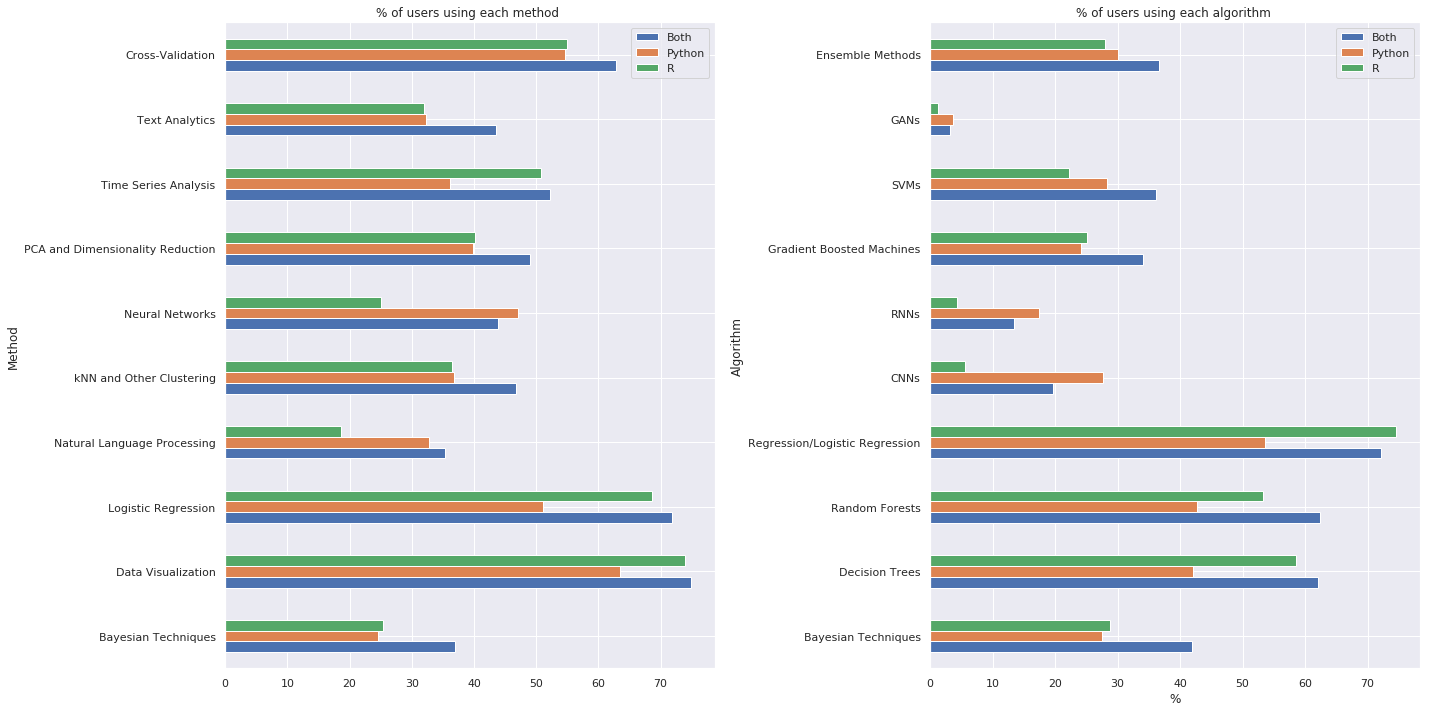

In [23]:
d={}
for technique in techniques :
    d[technique]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['WorkMethodsSelect']):
        if technique in elem : 
            d[technique][df['PythonVsR'].iloc[i]]+=1
    d[technique]['Python']=100*d[technique]['Python']/len(df[df['PythonVsR']=='Python'])
    d[technique]['R']=100*d[technique]['R']/len(df[df['PythonVsR']=='R'])
    d[technique]['Both']=100*d[technique]['Both']/len(df[df['PythonVsR']=='Both'])
    
d_algo={}
for algo in algorithms :
    d_algo[algo]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['WorkAlgorithmsSelect']):
        if algo in elem : 
            d_algo[algo][df['PythonVsR'].iloc[i]]+=1
    d_algo[algo]['Python']=100*d_algo[algo]['Python']/len(df[df['PythonVsR']=='Python'])
    d_algo[algo]['R']=100*d_algo[algo]['R']/len(df[df['PythonVsR']=='R'])
    d_algo[algo]['Both']=100*d_algo[algo]['Both']/len(df[df['PythonVsR']=='Both'])
            
f,ax=plt.subplots(1,2,figsize=(20,10))

(pd.DataFrame(d)).transpose().plot(kind='barh',ax=ax[0])
ax[0].set_title("% of users using each method ")
ax[0].set_xlabel('')
ax[0].set_ylabel("Method")

(pd.DataFrame(d_algo)).transpose().plot(kind='barh',ax=ax[1])
ax[1].set_title("% of users using each algorithm ")
ax[1].set_xlabel('%')
ax[1].set_ylabel("Algorithm")

plt.tight_layout()
plt.show();

Two different questions, very related to each other, were asked to the workers community to see what kind of algorithms and methods they use at work. Since some responses were available for both questions (like Bayesian Techniques for example), the answer to those two questions overlap, hence the utility of displaying one next to the other.

First thing I noticed is that for a given method / algorithm except Neural Networks (GANs/CNN/RNN), **the % of respondents who code with both languages and use that method is higher than the % of respondents who code only with R(resp. Python) and use that method !  ** This means that people who master both languages *have the best of both worlds* and use all available methods.

On the Methods part, **Data visualization and Logistic Regression** seem to be fundamental assets for R users since 70% of them use those two methods. On the other hand, even if ** Neural Networks and Nature Language Processing** aren't the most used techniques amongst Python users, they're the techniques where the difference between R and Python users is the biggest (48% vs 25% for the first and 32% vs 19% for the second) . The same thing happens with algorithms where a really small proportion of R users work with CNNs/RNNs (type of Neural Networks) and Python users seem to use a bit of every algorithm out there.

For now, these results here tell us that if you're a Python user, your use of algorithms / methods may differ according to where you work, what you do ... But for R users, it seems like they all work in areas where only some specific algorithms / methods are being used, and that's what we'll kind of confirm thanks to the next visualizations.

In [24]:
df['MLSkillsSelect'].fillna('None',inplace=True)
skills = ['Natural Language Processing', 'Computer Vision', 'Adversarial Learning',
          'Supervised Machine Learning (Tabular Data)', 'Reinforcement learning',
          'Unsupervised Learning', 'Outlier detection (e.g. Fraud detection)',
          'Time Series', 'Recommendation Engines']

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



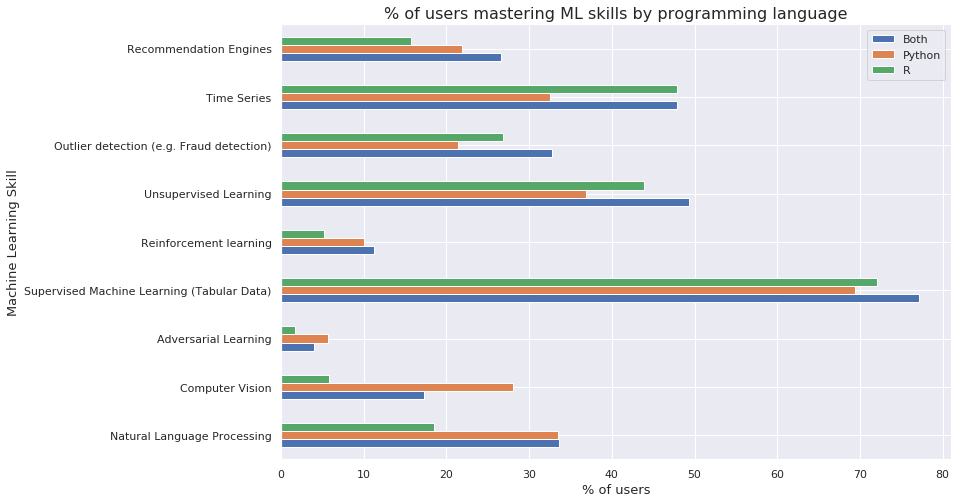

In [25]:
d_skills={}
for skill in skills : 
    d_skills[skill]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['MLSkillsSelect']):
        if skill in elem : 
            d_skills[skill][df['PythonVsR'].iloc[i]]+=1
    d_skills[skill]['Python']=100*d_skills[skill]['Python']/len(df[df['PythonVsR']=='Python'])
    d_skills[skill]['R']=100*d_skills[skill]['R']/len(df[df['PythonVsR']=='R'])
    d_skills[skill]['Both']=100*d_skills[skill]['Both']/len(df[df['PythonVsR']=='Both'])
    
(pd.DataFrame(d_skills)).transpose().plot(kind='barh',figsize=(12,8))
plt.ylabel("Machine Learning Skill", fontsize=13)
plt.xlabel("% of users", fontsize=13)
plt.title("% of users mastering ML skills by programming language", fontsize=16)
plt.show();


A great proportion of R coders are skilled in unsupervised learning, outlier detection, time series analysis and supervised learning. Also, time series mastery seems to be more important for R users than for Python users. But when it comes to **new emerging fields** like reinforcement learning, NLP and computer vision, Python is miles ahead. Indeed, 28% of Python programmers consider themselves to be skilled in Computer Vision when only 7% of R programmers do ! For NLP, the difference is not as big but still, 33% VS 19% ...

In [26]:
df['WorkDataTypeSelect'].fillna('None',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



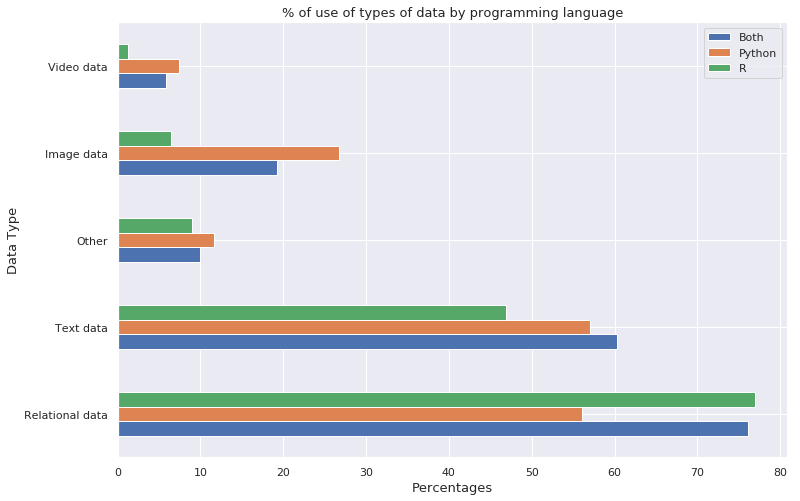

In [27]:
data_type = ['Relational data', 'Text data', 'Other',
             'Image data', 'Image data', 'Video data']
d_data={}
for dtype in data_type :
    d_data[dtype]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['WorkDataTypeSelect']):
        if dtype in elem : 
            d_data[dtype][df['PythonVsR'].iloc[i]]+=1
    d_data[dtype]['Python']=100*d_data[dtype]['Python']/len(df[df['PythonVsR']=='Python'])
    d_data[dtype]['R']=100*d_data[dtype]['R']/len(df[df['PythonVsR']=='R'])
    d_data[dtype]['Both']=100*d_data[dtype]['Both']/len(df[df['PythonVsR']=='Both'])
    
(pd.DataFrame(d_data)).transpose().plot(kind='barh',figsize=(12,8))
plt.ylabel("Data Type", fontsize=13)
plt.xlabel("Percentages", fontsize=13)
plt.title("% of use of types of data by programming language", fontsize=13)
plt.show();

This plot gives a great insight about the use of either language according to the data we have to handle.
* 27% of Python users deal with Image datasets and nearly 60% of them deal with text datasets. On the other hand, only 7% of R users deal with image datasets and 47% with text data set. On the image part, let's recall that in ML skills, we found really few R users that are skilled at Computer Vision 
* On the other hand, 78% of R users deal with [Relational data](http://searchsqlserver.techtarget.com/definition/relational-database) (!) while only 56% of Python users deal with that kind of data.  

This means that R users tend to work in companies that mostly use relational datasets only, while **Python users are more versatile**!         
Again, this tells the same story as the algorithms plot did and there's a link between them : if you're going to work with text/image data, you better use neural networks (and we saw that only few R users do so) hence the correlation ! 

** Our takeaway from the 4 previous plots is :** 
* **The proportion of R coders using algorithms / methods / datasets related to deep learning (computer vision, NLP ...) is very small and all R coders seem to follow the same path (clear focus on some specific areas).** 
* ** A large proportion of Python coders use basic/classic stuff such as logistic regression but a non-negligible proportion focuses on deep learning as opposed to R users.**

Speaking about that, let's see where R and Python coders work and what tasks do they perform at work.

### Industry and Job title 
<a id="industry"></a>

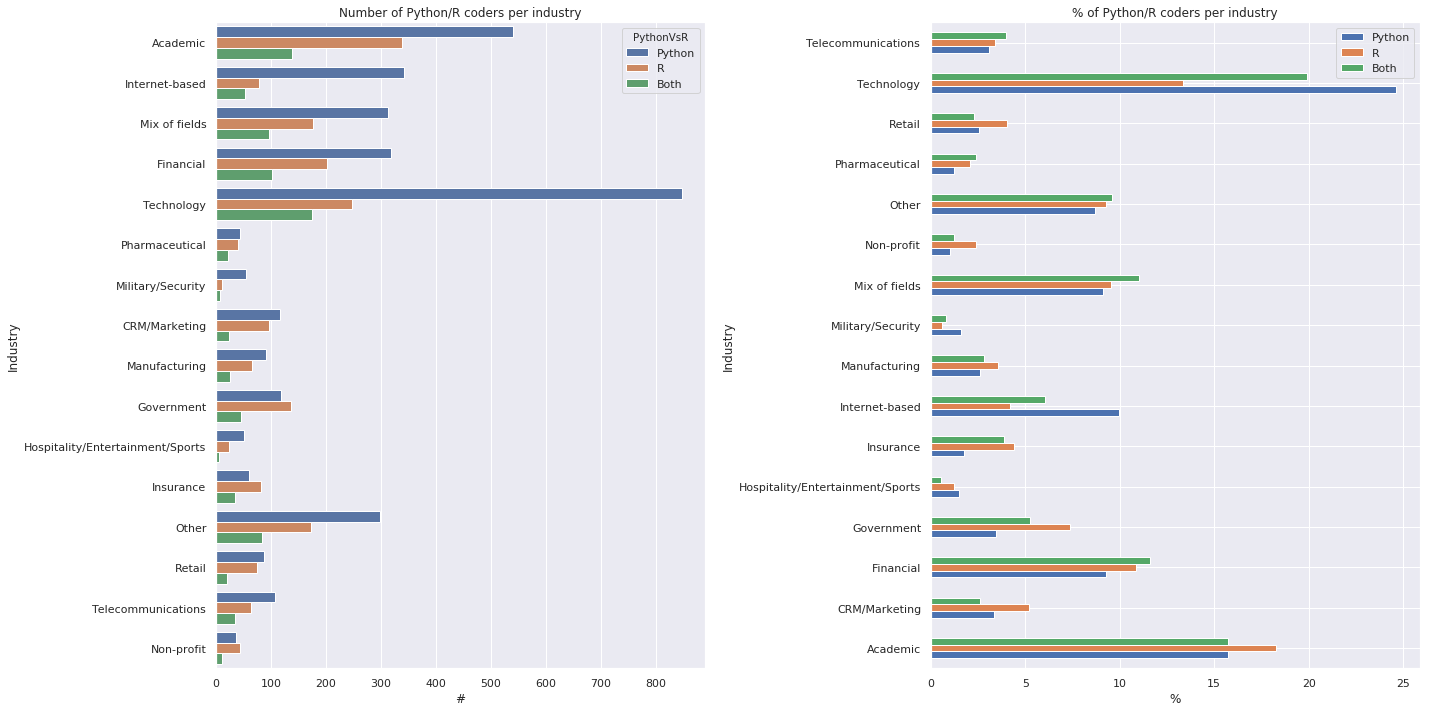

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(y='EmployerIndustry', hue='PythonVsR',data=df,ax=ax[0])
ax[0].set_title("Number of Python/R coders per industry")
ax[0].set_xlabel('#')
ax[0].set_ylabel("Industry")

d_ind={}
for value in df['PythonVsR'].value_counts().index : 
    temp=df[df['PythonVsR']==value]
    d_ind[value]={}
    for industry in df['EmployerIndustry'].value_counts().index :
        d_ind[value][industry]=100*len(temp[temp['EmployerIndustry']==industry])/len(temp)

(pd.DataFrame(d_ind)).plot(kind='barh',ax=ax[1])
ax[1].set_title('% of Python/R coders per industry')
ax[1].set_xlabel('%')
ax[1].set_ylabel("Industry")

plt.tight_layout()
plt.show();



As I said earlier, there are some cases where both plots (proportion and raw number of coders) can give valuable informations : this is one of those case and I kept both of them here on purpose, here's what we notice : 

**The plot on the left** shows that even if there are more Python users than R users in this survey as we saw earliers, we notice on this plot that there are industries where R is still dominant or as competitive as Python.

* R fares as good as / better than Python in the following industries : Government, Insurance, Non-profit, Pharmaceutical, Retail and Marketing.
* Python outdoes R, by a large margin, in the tech industry which is also the industry with the most respondents in this survey (which makes sense since Data Scientist is a tech job).

**The plot on the right** shows that when it comes to industries, it's R who seems to be more versatile ! When we see the proportions, we notice that it's way more balanced for R than it is for Python.

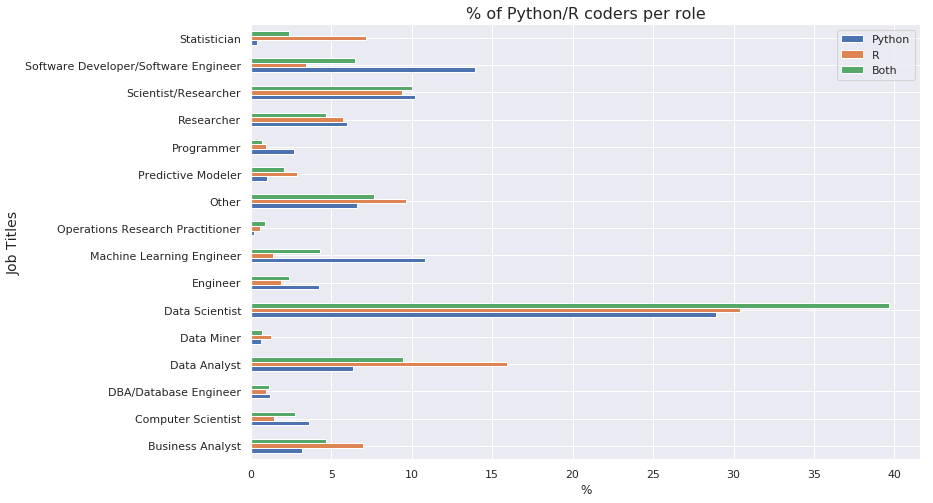

In [29]:
d_title={}
for value in df['PythonVsR'].value_counts().index : 
    temp=df[df['PythonVsR']==value]
    d_title[value]={}
    for title in df['CurrentJobTitleSelect'].value_counts().index :
        d_title[value][title]=100*len(temp[temp['CurrentJobTitleSelect']==title])/len(temp)

ax = (pd.DataFrame(d_title)).plot(kind='barh',figsize=(12,8))
ax.set_title('% of Python/R coders per role',fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Job Titles",fontsize=14)

plt.show();


* We notice that most of R coders and Python coders are data scientists, well the opposite would have been very surprising !     
* A great proportion of Python coders (a cumulative 25%) are either Software Engineers or Machine Learning Engineers while only 5% of R coders occupy those two roles ! Seems that really few R practitioners are considered ML masters.
* 30% of R coders are Statisticians, Data Analysts or Business Analysts while only 11% of Python coders have one these 3 job titles.

**Except for the Data Scientist role (and Student / Researcher) it seems that the roles where we have the highest % of R coders are the roles where the % of Python coders is the lowest and vice versa !**


Ouf ! This confrontation between R and Python is really intense, let's take a quick break from it to get our break back by asking ourselves the following question : *How dependant is the job titile of the major of a worker*

Up until now, we've been analyzing the dataset through visualizations and significant plots. I would like to introduce to beginners how we evaluate dependacy between two categorical variables in statistics. Ladies and gentlemen, let me introduce to you the one and only **chi2 test of independence**!

I'd recommend reading this [this](http://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP) for people who never heard about this test, it's a really simple explanation followed by an example of its use.

Let's apply it here, first comes the contingency table : 

In [30]:
from scipy.stats import chi2_contingency

conti = pd.crosstab(data['MajorSelect'], data['CurrentJobTitleSelect'])
conti

CurrentJobTitleSelect,Business Analyst,Computer Scientist,DBA/Database Engineer,Data Analyst,Data Miner,Data Scientist,Engineer,Machine Learning Engineer,Operations Research Practitioner,Other,Predictive Modeler,Programmer,Researcher,Scientist/Researcher,Software Developer/Software Engineer,Statistician
MajorSelect,,,,,,,,,,,,,,,,
A health science,10,4,2,13,1,18,1,4,1,17,1,5,9,26,6,2
A humanities discipline,11,3,3,33,4,29,3,6,0,28,2,5,13,16,15,5
A social science,38,1,2,89,5,137,4,5,5,50,11,6,51,37,17,11
Biology,8,1,1,19,2,69,5,5,0,18,1,3,9,73,14,9
Computer Science,105,206,70,238,27,530,101,262,4,254,23,187,176,186,859,11
Electrical Engineering,49,22,14,69,9,176,131,82,4,81,13,24,83,82,191,5
Engineering (non-computer focused),105,11,19,73,7,236,140,45,9,118,21,24,45,89,105,13
Fine arts or performing arts,5,1,0,4,0,5,1,1,0,13,0,3,7,1,8,0
I never declared a major,3,0,0,7,0,7,3,2,0,6,0,0,2,2,13,1


**To be entirely accurate and honest, we shouldn't be applying the chi-2 test here because one of the hypothesis is that all values should be higher than 5. Here we notice for example that we have 0 computer scientist that had Psychology as a Major.**       
That being said, my goal here is to show you guys how to conduct such a test during your future analysis so we'll let that go, no offense to our beloved rigourous statisticians :)      
So now the chi-2 test : 

In [31]:
p_value = chi2_contingency(conti,lambda_='log-likelihood')[1]
p_value

0.0

The p-value that the chi2 test returns is a positive number. The lower the p-value the more correlated are our 2 categorical features. Here we got p=0 so basically, our features are as dependent as mathematically possible ! 

Okay the break is over, take your sit back and enjoy the rest of the battle ! 

### Main function and percentage of time for specific tasks  
<a id="tasks"></a>

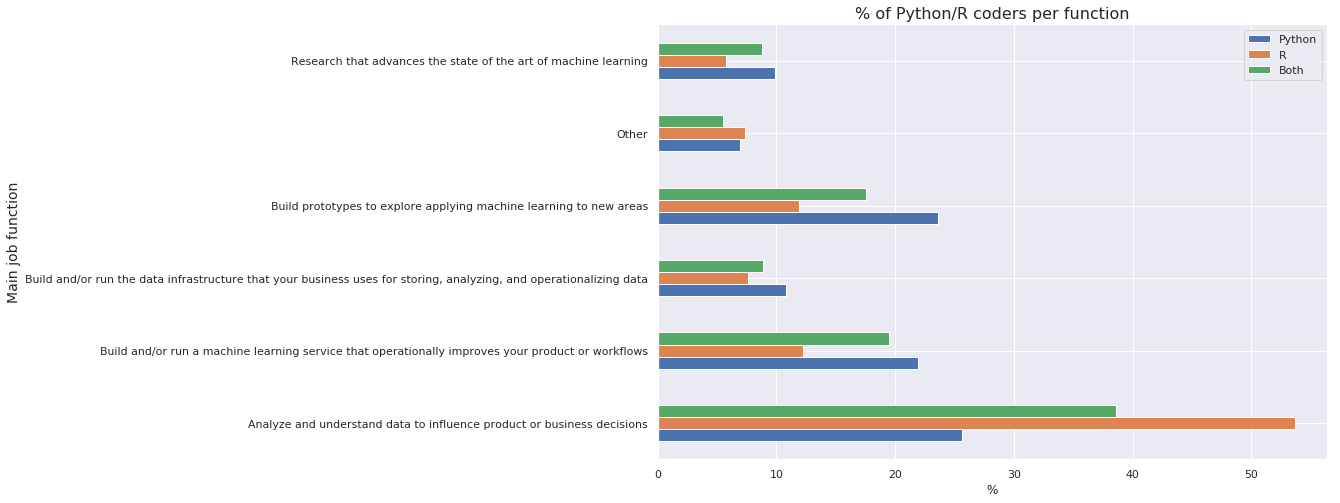

In [32]:
d_title={}
for value in df['PythonVsR'].value_counts().index : 
    temp=df[df['PythonVsR']==value]
    d_title[value]={}
    for title in df['JobFunctionSelect'].value_counts().index :
        d_title[value][title]=100*len(temp[temp['JobFunctionSelect']==title])/len(temp)

ax = (pd.DataFrame(d_title)).plot(kind='barh',figsize=(12,8))
ax.set_title('% of Python/R coders per function',fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Main job function",fontsize=14)

plt.show();

It seems that most R users tend to perform tasks related to **business /data analytics** part. Let's recall what we found earliers : More than 70% of R coders use data visualization (ML Methods) and more than 20% of them are either business analysts or data analysts (Role). Thus, it makes sense to see here that most of R users' role at work is to analyze data for business purpose.                                                                                     
On the other hand, Python users are doing a bit of everything and we find pretty high percentages for three tasks : Business analytisc, building ML prototypes and build ML services that improve the product.

So what's the volume of work for each task (gathering data, visualizing it ...) in a DS job ? 


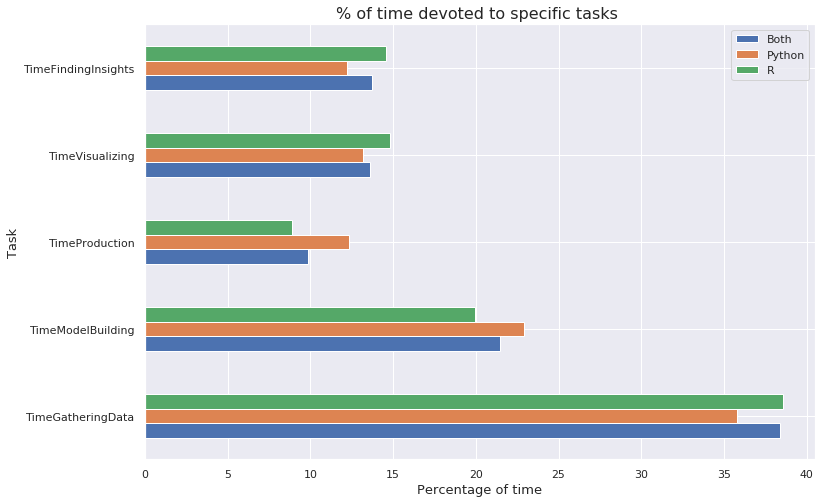

In [33]:
d_task={}
tasks=['TimeGatheringData','TimeModelBuilding','TimeProduction','TimeVisualizing','TimeFindingInsights']
for task in tasks : 
    d_task[task]={'Python':df[df['PythonVsR']=='Python'][task].mean(),
                  'R':df[df['PythonVsR']=='R'][task].mean(),
                  'Both':df[df['PythonVsR']=='Both'][task].mean()}
    
(pd.DataFrame(d_task)).transpose().plot(kind='barh',figsize=(12,8))
plt.ylabel("Task", fontsize=13)
plt.xlabel("Percentage of time", fontsize=13)
plt.title("% of time devoted to specific tasks ", fontsize=16)
plt.show();

Both type of coders spend most of their time gathering data (38% for Python users, 40% for R) and building models (19% for Python, 18% for R).                            
Generally, both type of coders seem to invest the same time for nearly all tasks. For me, this means that using R or Python is more about a preference than an obligation towards some specific usage.     

That being said, **the biggest difference observed comes for putting work into production (12% for Python users, 7% for R)**. I remember the first time I asked my manager during my internship why do we use Python rather than R and he simply replied *'We always want to put our models into production and doing that using R can really be a pain in the ass'*.         
I've personnaly never used R production-wise so I can't relate, but I guess that these statistics support my manager's words ! 

> EDIT : I actually recalled that there was a specific question in the survey for workers which  was *At work, how often do the models you build get put into production?* and decided to delve deeper into this aspect.       
Possible answers were frequencies so I tried to check the % of each frequency for Python (resp. R) users and compare between the percentages for both communities.

In [34]:
df['WorkProductionFrequency']=df['WorkProductionFrequency'].fillna("Don't know")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



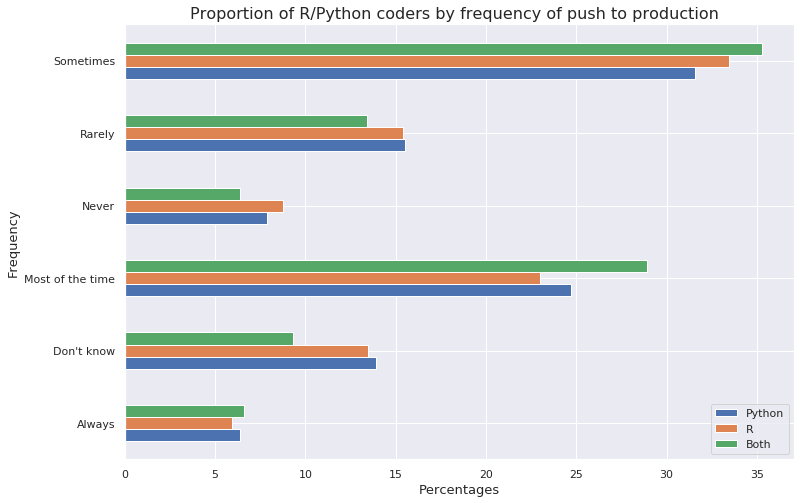

In [35]:
d_prod={}
for value in df['PythonVsR'].value_counts().index : 
    temp=df[df['PythonVsR']==value]
    d_prod[value]={}
    for frequency in df['WorkProductionFrequency'].value_counts().index :
        d_prod[value][frequency]=100*len(temp[temp['WorkProductionFrequency']==frequency])/len(temp)

(pd.DataFrame(d_prod)).plot(kind='barh',figsize=(12,8))
plt.ylabel("Frequency", fontsize=13)
plt.xlabel("Percentages", fontsize=13)
plt.title("Proportion of R/Python coders by frequency of push to production  ", fontsize=16)
plt.show();

* If we combine *Always and Most of the time*, we find that 35.63% of Python users/ 30.43% of R users almost always push their models to production.
* If we combine *Never and Rarely*, we find that 22.07% of Python users / 23.27% of R users almost never push their models to production. Taking only never the gap is bigger : 6.46% for Python users and 11.25% for R users.

So yes this supports what we saw above, **R coders seem to diminish the importance of putting work to production.**

### Experience as code-writers 
<a id="tenure"></a>

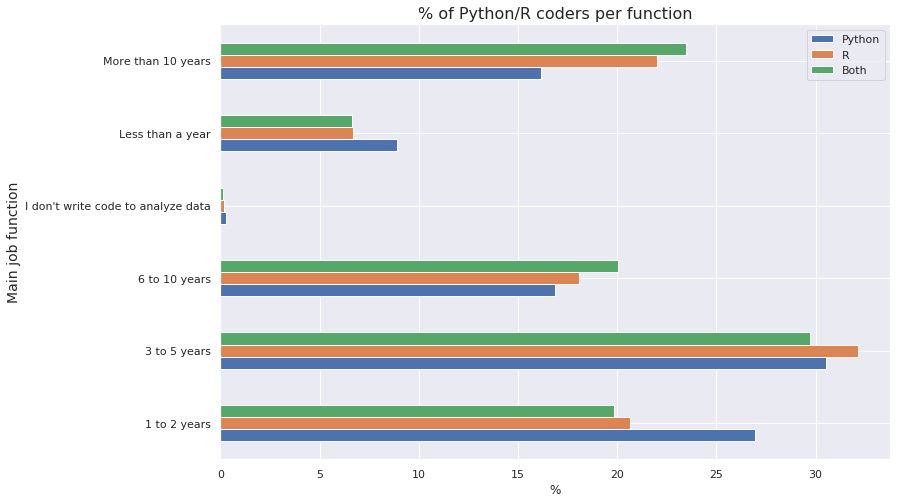

In [36]:
d_tenure={}
for value in df['PythonVsR'].value_counts().index : 
    temp=df[df['PythonVsR']==value]
    d_tenure[value]={}
    for dur in df['Tenure'].value_counts().index :
        d_tenure[value][dur]=100*len(temp[temp['Tenure']==dur])/len(temp)

ax = (pd.DataFrame(d_tenure)).plot(kind='barh',figsize=(12,8))
ax.set_title('% of Python/R coders per function',fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Main job function",fontsize=14)

plt.show();

Here's what we observe :
1. The most voted duration of coding, for both R and Python coders, is 3-5 years.
2. For Python coders, the second most voted duration is 1-2 years while for R coders, the second most voted duration is actually 'More than 10 years' !

We conclude that R coders tend to be more experienced as they've been writing code for a longer period of time whil Python started to be more widely used during the 5 last years !

### What language would you recommend for DS beginners 
<a id="learnfirst"></a>

In [37]:
df['LanguageRecommendationSelect'].fillna('Other',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



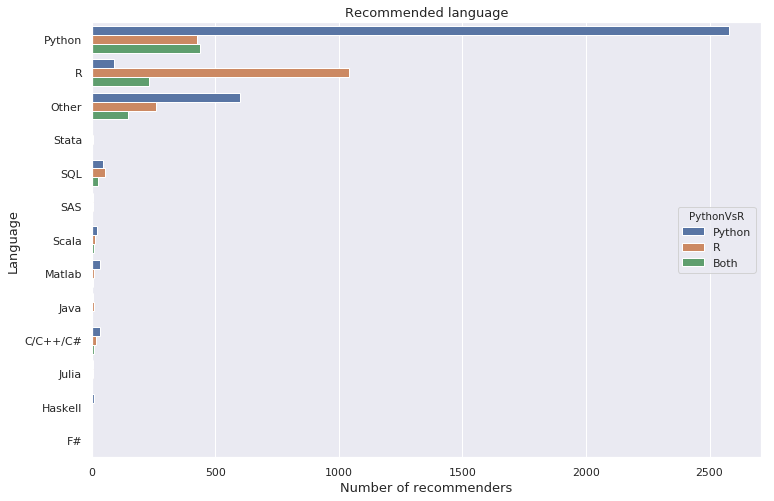

Proportion of Python users who recommend R as the first language to learn: 2.68%
Proportion of R users who recommend Python as the first language to learn: 23.12%


In [38]:
plt.figure(figsize=(12,8))
sns.countplot(y='LanguageRecommendationSelect',hue='PythonVsR',data=df)
plt.ylabel("Language", fontsize=13)
plt.xlabel("Number of recommenders", fontsize=13)
plt.title("Recommended language", fontsize=13)
plt.show();

mask1=(df['LanguageRecommendationSelect'] == 'R')& (df['PythonVsR']=='Python')
print('Proportion of Python users who recommend R as the first language to learn: {:0.2f}%'.format(100*len(df[mask1])/len(df[df['PythonVsR']=='Python'])))

mask1=(df['LanguageRecommendationSelect'] == 'Python')& (df['PythonVsR']=='R')
print('Proportion of R users who recommend Python as the first language to learn: {:0.2f}%'.format(100*len(df[mask1])/len(df[df['PythonVsR']=='R'])))

As expected, the majority of each community recommended the language it uses, that's fair.
BUT, **R users are a lot more enclined to recommend Python than Python users are to recommend R ! ** Indeed, only 2.63% of Python users recommended R while 23.12% (!) of R users recommended Python. This means that a part of the R community is now convinced that Python may be the real deal for Machine Learning.  
We can also notice that people who use Python just as much as R are also recommending Python more than they are recommending R.



## US working Kagglers : Annual income analysis
<a id="salary"></a>
***

For this part of the analysis, we'll select 20 features, mostly demographic, that can greatly impact the income of a person and that will be further used for dimensionality reduction.

In [39]:
demographic_features = ['GenderSelect','Country','Age',
                        'FormalEducation','MajorSelect','ParentsEducation',
                        'EmploymentStatus', 'CurrentJobTitleSelect',
                        'DataScienceIdentitySelect','CodeWriter',
                        'CurrentEmployerType','JobFunctionSelect',
                        'SalaryChange','RemoteWork','WorkMLTeamSeatSelect',
                        'Tenure','EmployerIndustry','EmployerSize','PythonVsR',
                        'CompensationAmount']
data_dem = data[demographic_features]
data_dem.head(5)

,GenderSelect,Country,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Bachelor's degree,Management information systems,A doctoral degree,Employed full-time,DBA/Database Engineer,Yes,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I am not currently employed,Always,Standalone Team,More than 10 years,Internet-based,100 to 499 employees,None,NaN
1,Female,United States,30.0,Master's degree,Computer Science,A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Less than a year,NaN,NaN,None,NaN
2,Male,Canada,28.0,Master's degree,Engineering (non-computer focused),A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3 to 5 years,NaN,NaN,None,NaN
3,Male,United States,56.0,Master's degree,Mathematics or statistics,High school,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,Yes,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,NaN,Standalone Team,More than 10 years,Mix of fields,NaN,None,"250,000"
4,Male,Taiwan,38.0,Doctoral degree,Engineering (non-computer focused),Primary/elementary school,Employed full-time,Computer Scientist,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I do not want to share information about my sa...,Rarely,Business Department,More than 10 years,Technology,"5,000 to 9,999 employees",None,NaN


### American Kagglers annual income
<a id="us_salary"></a>

Well, it would be cool to know how much data scientists are getting paid actually ! Unfortunately, even if 73%
of the respondents are employed (see part1), only 26.83% of them gave a proper answer to the income so we can't be
extremely precise here.

Personnaly, I'm not a big fan of converting every salary to USD and then treat all the respondents the same to calculate values such as median of salary of all data scientists because being paid 100k$ in the US is absolutely not comparable to being paid that same amount in India or Portugal for example.    
I'd rather convert all the salaries amounts to dollars but treat each country separatly, I think this makes a lot more sense
than checking the median for everything.   

In fact, if you want to see problem that could arise when combining all countries, check what heppened in this [great kernel](http://www.kaggle.com/christinampoid/what-affects-your-compensation) : Salary vs Major + the very accurate point made by @DrGuillermo in the comments.

Anyway, we'll only check the salary for US citizens as it's the most represented country in this survey so it would yield the most significant results.

> EDIT : After doing some research, I came across the method that economists and policy makers use to make comparisons across countries involving salaries and economic weel-being. For better readability and since the subject and content are both different, it was better to devote a different kernel to the global analysis, you can find it [here](http://www.kaggle.com/mhajabri/salary-and-purchasing-power-parity/).

In [40]:
#Convert all salaries to floats
data_dem['CompensationAmount'] = data_dem['CompensationAmount'].fillna(0)
data_dem['CompensationAmount'] = data_dem.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',','')))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



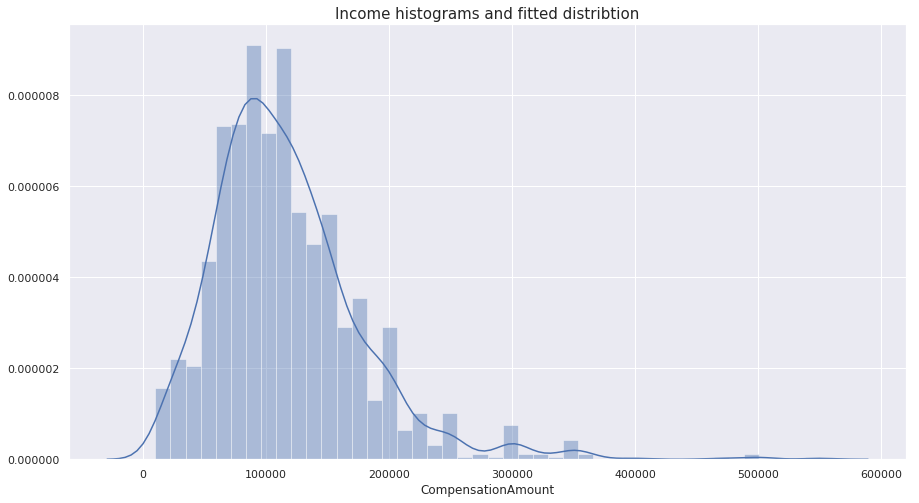

In [41]:
#Remove Outliers
data_dem = data_dem[(data_dem['CompensationAmount']>5000) & (data_dem['CompensationAmount']<1000000)]
data_dem = data_dem[data_dem['Country']=='United States']

plt.subplots(figsize=(15,8))
sns.distplot(data_dem['CompensationAmount'])
plt.title('Income histograms and fitted distribtion',size=15)
plt.show();


In [42]:
print('The median salary for US data scientist: {} USD'.format(data_dem['CompensationAmount'].median()
))
print('The mean salary for US data scientist: {:0.2f} USD'.format(data_dem['CompensationAmount'].mean()
))


The median salary for US data scientist: 107000.0 USD
The mean salary for US data scientist: 116649.99 USD


The distribution shows that most salaries lie between 50k and 140k USD. According to Glassdoor, the average annual salary for a data scientist is 128k$ so it's coherent with what we've just got here.   

Seaborn's *'distplot'* fits a univariate distribution using kernel density estimation [KDE](http://en.wikipedia.org/wiki/Kernel_density_estimation). We notice with the bins that most kagglers have an income between 70k and 130k and that the fitted distribution is skewed right which means there's much more outliers towards the right (unusually high incomes) than towards the left.

Here's a more sophisticated plot for the distribution of the annual income.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



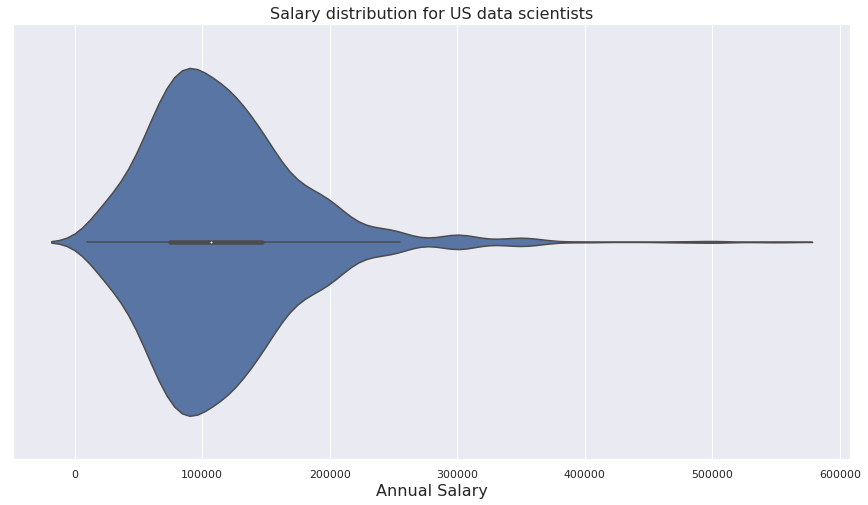

In [43]:
plt.figure(figsize=(15,8))
sns.violinplot(x='CompensationAmount', data=data_dem)
plt.title("Salary distribution for US data scientists", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.show();

### Salary VS Gender
<a id="gender_salary"></a>

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



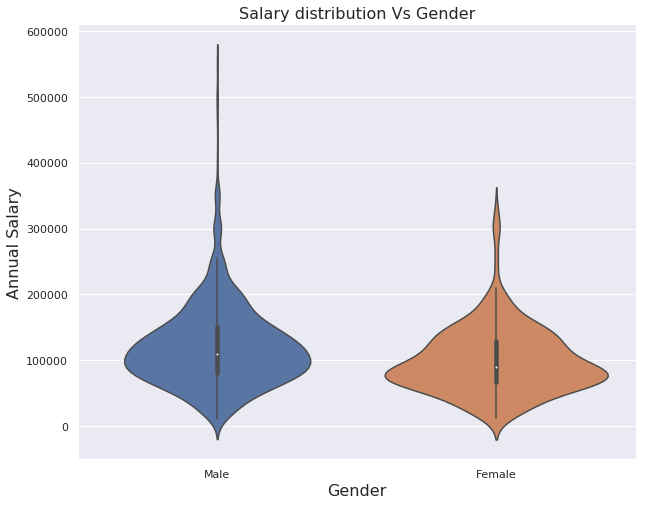

In [44]:
temp=data_dem[data_dem.GenderSelect.isin(['Male','Female'])]
plt.figure(figsize=(10,8))
sns.violinplot( y='CompensationAmount', x='GenderSelect',data=temp)
plt.title("Salary distribution Vs Gender", fontsize=16)
plt.ylabel("Annual Salary", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.show();

It seems that the salary gap between the two genders isn't too big but is still in favour of men.       
The average for male kagglers is a bit higher than the average for female kagglers.         
That being said, there's no woman with an income of 400k or higher while there are some outliers in the men part.

### Salary VS Formal Education
<a id="education_salary"></a>

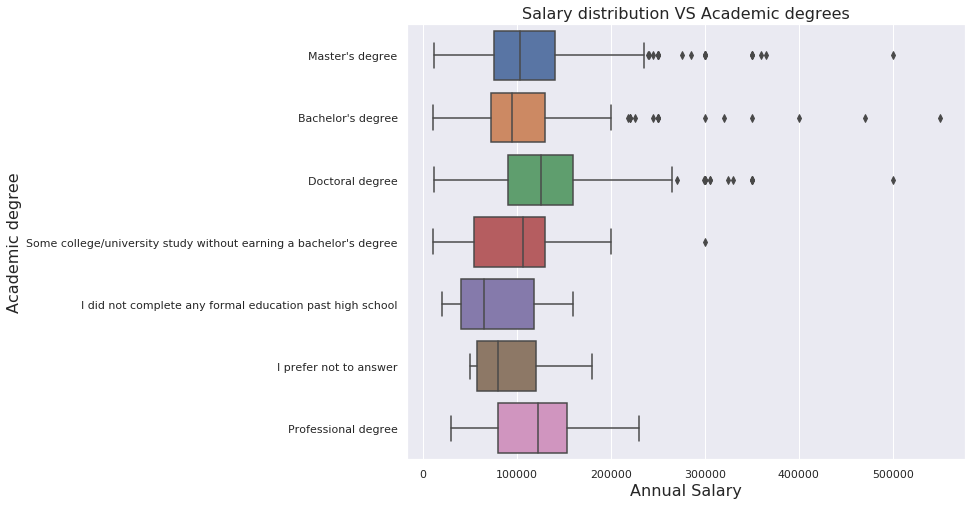

In [45]:
titles=list(data_dem['FormalEducation'].value_counts().index)
temp=data_dem[data_dem.FormalEducation.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot( x='CompensationAmount', y='FormalEducation',data=temp)
plt.title("Salary distribution VS Academic degrees", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Academic degree", fontsize=16)
plt.show();

Let's recall what the boxes mean in seaborn's boxplot, the documentation says : *The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”*.    

The median follows a reasonable trend :** the higher the education, the higher the median annual income** except for doctoral education that is shadowed by professional degrees. That being said, the PhD box contain outliers + its whiskers are more extended than those of the Professional degree box so all in all, doctors are the best paid kagglers.  

The median for people who attended college but hold no degree is higher than the median for Bachelors and Masters holders BUT the first quartile (Q1) of first community is way smaller than the first quartile of the other two communities.   
So looking at the turquoise blue box and comparing it with the light pink and mustard yellow boxes, we notice that the majority of people with a professional degree are between Q1 and the median while the majority of Bachelors and Masters holders are between the median and Q3.

### Salary VS Job Title
<a id="jobtitle_salary"></a>

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



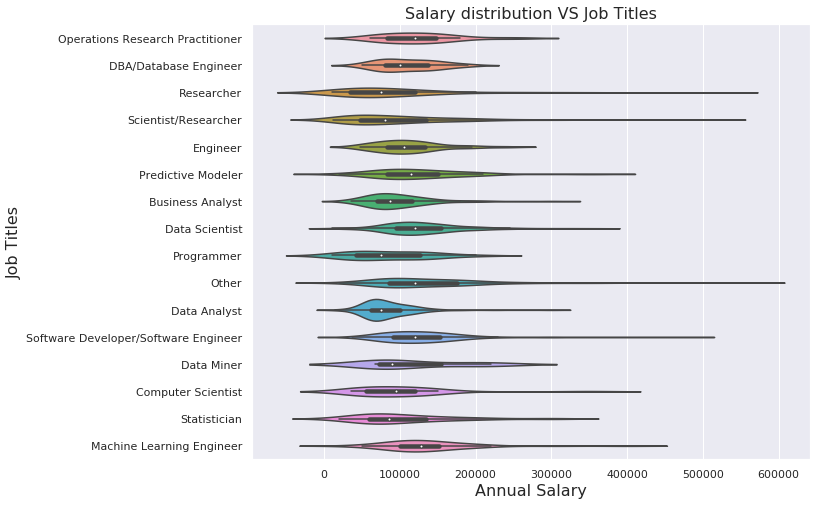

In [46]:
titles=list(data_dem['CurrentJobTitleSelect'].value_counts().index)
temp=data_dem[data_dem.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(10,8))
sns.violinplot( x='CompensationAmount', y='CurrentJobTitleSelect',data=temp)
plt.title("Salary distribution VS Job Titles", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Job Titles", fontsize=16)
plt.show();

People labeled as **Machine Learning Engineers or Data Scientst have an annual average income higher than Data Analysts, Business Analysts, Statisticians or Programmers. **    
One should be aware of the job's title when looking for work because the salaries seem to be really different even if many resepondents  identify as data scientists ! 

### Dimensionality reduction and 2D-plotting
<a id="mca"></a>

The most known / used dimensionality reduction technique has to be PCA. The problem with PCA is that it works best for numerical / continuous variables which is not the case here.

A similar technique, **Multi Correspondence Analysis (MCA)**, is used to achieve dimensionality reduction for categorical data. Simply put, It's a technique that use chi-2 independence tests to create a distance between row points that will be further contained in a matrix. Each of the eigenvalues of this matrix has an inertia (similar to expressed variance for PCA) and the process to obtain the 2D visualization is the same. You can read more about it here https://www.wikiwand.com/en/Correspondence_analysis  and here https://www.wikiwand.com/en/Multiple_correspondence_analysis (to get more technical, you can check the references in the links).

In [47]:
data_dem['CompensationAmount'] = pd.cut(data_dem['CompensationAmount'],bins=[0,130000,1000000],
                                            include_lowest=True,labels=[1,2])
data_dem['Age'] = pd.cut(data_dem['Age'],bins=[0,18,25,30,35,40,50,60,100],
                           include_lowest=True,labels=[1,2,3,4,5,6,7,8])
data_dem.drop('Country',axis=1,inplace=True)

We'll use the demographic properties and some of related to work answers (like language preference) to visualize the respondents. We'll try to see if it's possible to construct clusters by salaries.    
130k is an arbitrary treshold, I just tried to separate between the richer kagglers in the US and the others, let's see what we've got.

In [48]:
### NOT WORKING ON KAGGLE SERVERS (no module prince)####
#import prince
#np.random.seed(42)
#mca = prince.MCA(data_viz, n_components=2,use_benzecri_rates=True)
#mca.plot_rows(show_points=True, show_labels=False, color_by='CompensationAmount', ellipse_fill=True)

# I have uploaded an image instead.

![](http://img1.imagilive.com/1117/mca2e0b.png)

That's not so bad actually.      
* **There's an area where both poupulations overlap** and we can't really separate between two instances having incomes >130k or not. That's expected actually because salary is continuous and if we take for example one person with an annual income of 120k and another one with 135k, they probably have similar properties even if, with our treshold, they belong to two different classes.
* **The top part of the plot contains excusively people whose income is below 130k.** We drew a pink box to investigate further in what way the instances within that box look alike, we'll see that below.
* **The bottom part of the plot contains excusively people whose income is above 130k**. We drew a brown box to investigate further in what way the instances within that box look alike, we'll see that below.

In [49]:
"""If you want to execute the following two blocks of code and have the plot above,
install the package 'prince', copy all the code and uncomment it, you'll have the same outputs.
P.S : Don't forger the random seed !"""

#projections=mca.row_principal_coordinates
#projections.columns=['ax1','ax2']
#projections['target']=y.iloc[length]

#msk_p = ((projections['ax1']>-0.70) & (projections['ax1']<-0.45 )) & ((projections['ax2']<0.66) &(projections['ax2']>0.50))
#samples_p=projections[msk_p]
#indexes_p = samples_p.index #[133, 247, 499, 576, 2375, 3578, 3606, 3876, 5758, 6059, 10155, 10514, 11552, 13438, 15631]
#ex_p=data_dem.loc[indexes_p]

ex_p=data_dem.loc[[133, 247, 499, 576, 2375, 3578, 3606, 3876, 5758, 6059, 10155, 10514, 11552, 13438, 15631]]
ex_p.head(10)

,GenderSelect,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
133,Male,2,Master's degree,Engineering (non-computer focused),NaN,Employed full-time,Business Analyst,Yes,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased between 6% and 19%,NaN,Business Department,1 to 2 years,Retail,100 to 499 employees,R,1
247,Male,2,Bachelor's degree,Mathematics or statistics,A professional degree,Employed part-time,Business Analyst,Sort of (Explain more),Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased 20% or more,Rarely,IT Department,3 to 5 years,Manufacturing,"1,000 to 4,999 employees",R,1
499,Male,2,Bachelor's degree,Other,A master's degree,Employed full-time,Data Analyst,Yes,Yes,Employed by professional services/consulting firm,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Business Department,1 to 2 years,Financial,"10,000 or more employees",R,1
576,Female,2,Bachelor's degree,Mathematics or statistics,A master's degree,Employed full-time,Data Analyst,Yes,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Standalone Team,1 to 2 years,Technology,100 to 499 employees,Python,1
2375,Female,2,Bachelor's degree,Other,A master's degree,Employed full-time,Business Analyst,Sort of (Explain more),Yes,Employed by professional services/consulting f...,Analyze and understand data to influence produ...,I was not employed 3 years ago,NaN,Standalone Team,1 to 2 years,Internet-based,"1,000 to 4,999 employees",Python,1
3578,Male,2,Bachelor's degree,Mathematics or statistics,A master's degree,Employed part-time,Data Scientist,NaN,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,Has increased 20% or more,Rarely,IT Department,1 to 2 years,Technology,"10,000 or more employees",R,1
3606,Female,4,Master's degree,A health science,A master's degree,Employed full-time,Data Analyst,No,Yes,Employed by non-profit or NGO,Build and/or run the data infrastructure that ...,Has increased between 6% and 19%,Sometimes,Standalone Team,1 to 2 years,Non-profit,100 to 499 employees,R,1
3876,Female,3,Master's degree,Psychology,A master's degree,Employed full-time,Business Analyst,Sort of (Explain more),Yes,"Employed by college or university,Employed by ...",Analyze and understand data to influence produ...,Has stayed about the same (has not increased o...,Sometimes,Other,3 to 5 years,Non-profit,500 to 999 employees,R,1
5758,Male,2,Bachelor's degree,Mathematics or statistics,A doctoral degree,Employed full-time,Data Analyst,No,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Standalone Team,1 to 2 years,Technology,500 to 999 employees,R,1
6059,Male,2,Bachelor's degree,A social science,A professional degree,Employed full-time,Data Analyst,No,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Sometimes,Standalone Team,1 to 2 years,Insurance,"1,000 to 4,999 employees",R,1


The pink box contains 6 men and 4 women, all of them hold either a Bachelor's or a Master's degree.    
Most of them are between 18 and 25 years old and work either as Data Analysts or Business Analysts. Nearly all of them have been writing code to analyze data (Tenure) for 2 years at most.

This makes sense, that part of the plot must contain kagglers who have just started their careers (between 18 and 25 years old) and seem to work full time as business / data analysts.

Let's move on to the brown box.

In [50]:
#msk_r = ((projections['ax1']>0.2) & (projections['ax1']<0.7 )) & ((projections['ax2']<-0.80) &(projections['ax2']>-1.10))
#samples_r=projections[msk_r]
#indexes_r = samples_r.index  #[445, 3273, 4751, 4803, 4960, 11071, 11528, 13663, 13880]
#ex_r = data_dem.loc[indexes_r]

indexes_r=[445, 3273, 4751, 4803, 4960, 11071, 11528, 13663, 13880]
ex_r = data_dem.loc[indexes_r]

ex_r

,GenderSelect,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
445,Male,6,Doctoral degree,Computer Science,"Some college/university study, no bachelor's d...","Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Employed by professional services/consulting firm,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,IT Department,More than 10 years,Mix of fields,NaN,R,2
3273,Male,6,Some college/university study without earning ...,Computer Science,High school,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Other,Has stayed about the same (has not increased o...,Sometimes,Other,More than 10 years,Mix of fields,NaN,Both,2
4751,Male,7,Some college/university study without earning ...,Mathematics or statistics,A bachelor's degree,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,No,Yes,Self-employed,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,Business Department,More than 10 years,Technology,NaN,Python,2
4803,Male,5,Doctoral degree,Physics,A bachelor's degree,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,Most of the time,IT Department,More than 10 years,Other,NaN,R,2
4960,Male,8,Bachelor's degree,Other,A bachelor's degree,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased 20% or more,Always,IT Department,More than 10 years,Other,NaN,Python,2
11071,Male,7,Master's degree,Mathematics or statistics,High school,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,IT Department,More than 10 years,Other,NaN,None,2
11528,Male,7,Some college/university study without earning ...,Computer Science,"Some college/university study, no bachelor's d...","Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased between 6% and 19%,Sometimes,IT Department,More than 10 years,Financial,NaN,Python,2
13663,Male,8,Doctoral degree,Electrical Engineering,I don't know/not sure,Employed full-time,Scientist/Researcher,No,Yes,Employed by professional services/consulting firm,Build prototypes to explore applying machine l...,Has decreased between 6% and 19%,Sometimes,Standalone Team,More than 10 years,Government,20 to 99 employees,None,2
13880,Male,8,Doctoral degree,A social science,A professional degree,Employed full-time,Scientist/Researcher,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,Has increased between 6% and 19%,Rarely,Standalone Team,I don't write code to analyze data,Other,"5,000 to 9,999 employees",Python,2


The brown box contains men only. 4 of them hold a doctoral degree, others attended college without earning a degree.        
8 of the 9 instances are older than 45 years old and work as **independent** Data Scientists or pure Scientists.       
All of them have been writing code to analyze data for more than 10 years ! 

That part of the seems to contain male kagglers, older than 45 y.o who either hold senior positions in their workplace or work as private consulting data scientists that have been writing code since forever.

When we were looking at salaries for all the job titles, we found that business analysts / data analysts tend to be paid less than data scientists. In our 2D plot, we observed the same thing : the first box contained no data scientists, only analysts while the second one contained mainly data scientitst.


### Income Prediction : Classification ML problem 
**<a id="prediction"></a> **

Up until now, we've been analyzing and visualizing the data we've got from Kaggle. Actually, as we've seen before (Part 2), only **20% of data scientists' time is devoted to Machine Learning and model building ! ** Well, we're going to respect those proportions and actually include a simple model that predicts whether the income of an american kaggler is higher than 130k$ or not, a classic classification problem ! 

The 2D plot we've got above makes us optimistic because as we've seen, there's an overlap zone but the two populations seems to be clearly separated to some extent so hopefully our Machine Learning will 'learn' this distinction as well.

We're not going to build a sophisticated model but rather a simple **logistic regression** easily understandable and as we'll see, the results won't be bad at all :).

> **EDIT : I adopt here a classification approach and restrict it to US Kagglers. If you prefer a general income prediction (predict the exact value of the income) for all countries, check [this](http://www.kaggle.com/mhajabri/salary-and-purchasing-power-parity/) up.**

**Preprocessing and feature engineering**

Our dataset only contains categorical variables (even the age was binned at some point).    
When dealing with categorical variables, the two most used techniques are : 
* **Label encoding** : That means replacing by numbers, for example Bachelor's degree would become 1, Master's degree ->2 ... That's the best solution when the variable is ordinal, i.e when there's a natural order between the possible values of a variable (for Formal Education for example).
* **Ont Hot encoding** : That means “binarizing” the category (see [here](http://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)) for more explanation. 

We're going to perform one hot encoding for all the categorical variables and build a training and a test set.

In [51]:
temp=data_dem

target = temp['CompensationAmount']
target.replace(to_replace=[1,2], value=[0,1],inplace=True )
temp.drop('CompensationAmount',axis=1,inplace=True)
temp2=pd.get_dummies(data=temp,columns=list(temp))

np.random.seed(42)
perm = np.random.permutation(temp2.shape[0])
X_train , y_train = temp2.iloc[perm[0:round(0.8*temp2.shape[0])]] , target.iloc[perm[0:round(0.8*temp2.shape[0])]]
X_test , y_test = temp2.iloc[perm[round(0.8*temp2.shape[0])::]] , target.iloc[perm[round(0.8*temp2.shape[0])::]]


Let's check what kind of problem we're having here, with respect to the proportion of each class : 

In [52]:
print('Number of US kagglers with an income lower than 130k$ : {}'.format(len(target)-target.sum()))
print('Number of US kagglers with an income higher than 130k$ : {}'.format(target.sum()))

Number of US kagglers with an income lower than 130k$ : 1024
Number of US kagglers with an income higher than 130k$ : 489


 32% of the US respondents have an income higher than 130k$, so the dataset is a little imbalanced but nothing too worrying.   
X_train and X_test are obviously very sparse (a lot of 0s on each row) so we'll keep that in mind when building the model.

**Building the predictive model**

In [53]:
from sklearn.metrics import f1_score, precision_score, recall_score , accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import operator

#Since we're dealing with a sparse matrix, I think it's better to use l1-penalty that shrinks 
#coefficients to 0 to keep the most important features

clf = LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train,y_train)

coefs=np.transpose(clf.coef_)

coef_l1_LR = clf.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity achieved: %.2f%%" % sparsity_l1_LR)

feature_importance={}
for (feature,k) in zip(list(X_train),range(len(coefs))) : 
        feature_importance[feature]=abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1))
top5 = sorted_features[-5::]
top5

Sparsity achieved: 91.41%


[('EmployerIndustry_Academic', array([0.48824586])),
 ('Tenure_1 to 2 years', array([0.49955399])),
 ('CurrentJobTitleSelect_Data Analyst', array([0.50426265])),
 ('Age_2', array([0.62367669])),
 ('Tenure_More than 10 years', array([0.79461612]))]

L1 penalty achieves high sparsity (percentage of zero coefficients) of solutions. Large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. 

C=0.05 is a pretty small value for logistic regression and we see that we achieve a sparsity of 91.41%. We only do so to shrink coefficients to 0 a keep only what the models considers to be the most important features. Further, we're going to use a much higher C to build the final classifier.

We notice that the **most important feature is the answer to the question 'Have you been coding for more than 10 years ?'** Comes after that the answer to **'Are you between 18 and 25 years old ?'**

In [54]:
clf = LogisticRegression(penalty='l1', C=1, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train,y_train)
y_p = clf.predict(X_test)

accuracy , precision, recall  = accuracy_score(y_test,y_p), precision_score(y_test,y_p) , recall_score(y_test,y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))

Accuracy achieved by the classifier: 76.24%
Precision achieved by the classifier: 68.48%
Recall achieved by the classifier: 59.43%


That's really good scores considering that : 
* Logistic regression is the easiest and most simple classifier to build and understand
* We only selected 18 demographic features and one hot encoded them

**So with just basic preprocessing and a basic model, we get 68% precision and 60% recall !**         
Accuracy (#correct outputs / #total outputs) is not so bad too but that's expected since the dataset is a bit imbalanced.
To learn more about precision, recall and why those two measures are more accurate than accuracy (see what I did there?), check the following [link](http://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it/).

Let's recall that logistic regression outputs probabilities. A treshold (0.5 by default) is used to binarize the output, i.e if probability>0.5, predict positive class, else predict negative class.     
As the dataset is imbalanced, maybe reducing the threshold can yield better result because it's less probable to have a very high income. That's why we plot the [ROC curve](http://www.quora.com/Whats-ROC-curve) which basically helps to observe the trade-off between precision and recall when reducing/increasing the threshold, so here we go !

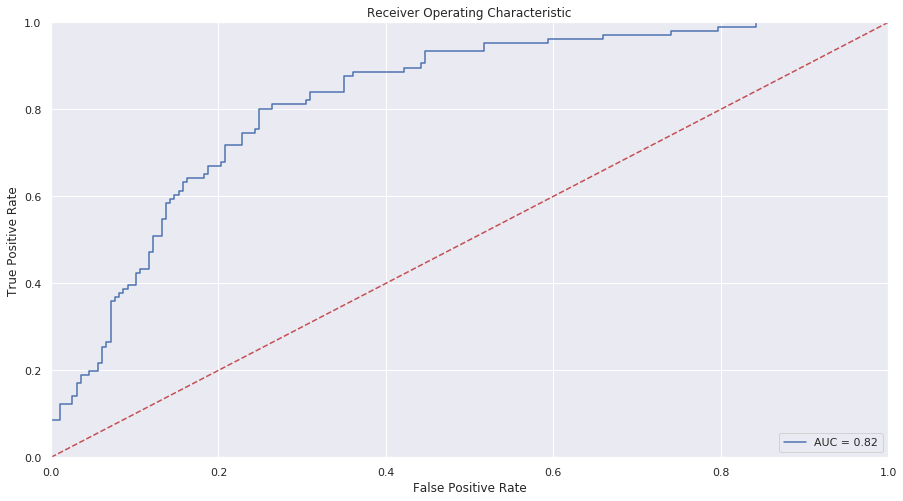

In [55]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC score isn't very high, that suggest that modifying the threshold wouldn't bring a big improvement to the model.   

That's it for the ML model part! I hope this can help beginners in DS to gain more experience and informations and I would encourage you to copy the same preprocessing and use more sophisticated models like SVM or Tree based models (Random Forest / Gradient boosting).

Okay so up until now, we've done a demographic overview of the respondents, we've analyzed the coding workers community and their use of programming languages and we conducted a study on the annual income for the workers community while also adding a little funny classification machine learning problem.

Let's now analyze the learners community of Kaggle !

## 4. Welcome to Data Science
<a id="learners"></a>
***

This Kaggle Survey participants weren't all experienced data scientists, far from that !  

Many of them (me included) are still aspiring to become data scientists and have a long way to go. Some are still students, others are looking for a career switch but they all have something in common : they're **learners **!    

So what are platforms are using for this purpose ? What do they want to learn most ? What job are they looking for ?
Well, let's see if we can answer those questions ! 

<img src="https://media.giphy.com/media/RUry0iE5xatig/source.gif">

According to the respondent type README file, learners can be:
- Students
- People formally or informally learning data science skills
- Professionals looking for a career switch
- Unemployed but looking for work people
We first extract a dataframe containing instances having at least one of these characteristics.

In [56]:
df_students=data[data['StudentStatus']=='Yes']
df_ds=data[(data['LearningDataScience']=="Yes, but data science is a small part of what I'm focused on learning") |
            (data['LearningDataScience']=="Yes, I'm focused on learning mostly data science skills")]
df_c=data[data['CareerSwitcher']=='Yes']
df_e=data[data['EmploymentStatus']=='Not employed, but looking for work']

learners=pd.concat((df_students,df_ds,df_c,df_e))
learners = learners[~learners.index.duplicated(keep='first')]

print('{} participants on this survey are learners.'.format(len(learners)))
print('In other words, {:0.2f}% of the participants on this survey are learners.'.format(100*len(learners)/len(data)))

5494 participants on this survey are learners.
In other words, 32.87% of the participants on this survey are learners.


### Demographic properties 
<a id="demographic"></a>

First thing first, let's see which countries has the most learners, check their age and the gender distribution amongst them.

In [57]:
sexe = learners['GenderSelect'].value_counts()
labels = (np.array(sexe.index))
proportions = (np.array((sexe / sexe.sum())*100))

trace = go.Pie(labels=labels, values=proportions,
              hoverinfo='lbal+percent')
layout = go.Layout(
    title='Gender distrubiton of learners'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Career_Switcher")



ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of pie
        Received value: 'lbal+percent'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'value', 'percent', 'name'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

We notice that there's a little progress compared to the general proportions (16.71% Female and 81.88% Male). This means that there are more and more women involved and interested in learning Data Science, that's good news.

In [58]:
print("Learners' median age", learners['Age'].median() )

Learners' median age 26.0


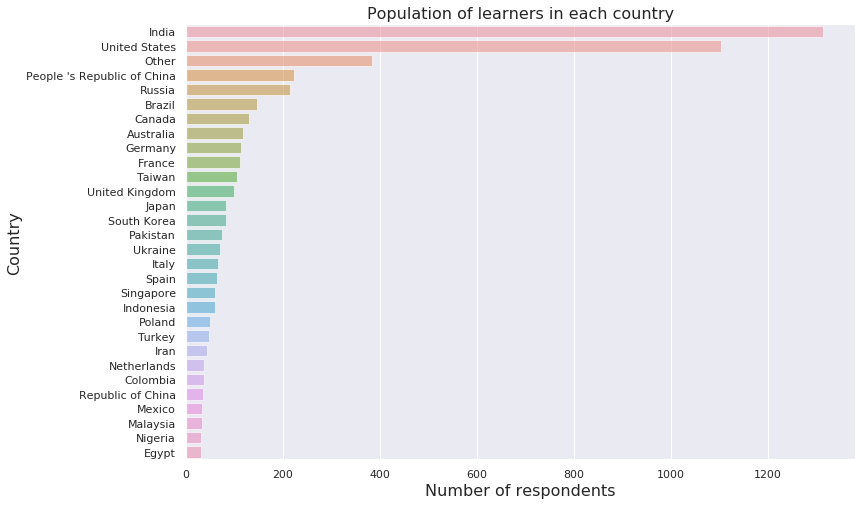

In [59]:
plt.figure(figsize=(12,8))
countries = learners['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Population of learners in each country", fontsize=16)
plt.xlabel("Number of respondents", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show();

Interesting, India has more data science learners than the U.S ! 

We saw on the first part of this EDA, several countries don't have many participants on this survey. A statistic that would be more meaningful is the % of learners amongst kaggle respondents of each country.

In [60]:
d_pcountries = {}
for value in data['Country'].value_counts().index:
    d_pcountries[value]=100*len(learners[learners['Country']==value])/len(data[data['Country']==value])
learners_p=pd.DataFrame.from_dict(d_pcountries, orient='index')
learners_p = learners_p.reset_index(drop=False)
learners_p.rename(columns = {'index':'Country',0:'% of learners'},inplace=True)


In [61]:
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [62]:
loc_df = pd.read_csv("./location_map.csv")
new_df = pd.merge(learners_p, loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df[['Country','CODE','% of learners']]

data_t = [ dict(
        type = 'choropleth',
        locations = new_df['CODE'],
        z = new_df['% of learners'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Proportion of learners (in%)'),
      ) ]

layout = dict(
    title = 'Country wise proportion of learners',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data_t, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


We notice that some of the highest proportions of learners are found in Nigeria, Egypt, Kenia and Indonesia. Those are countries where data science is at its very start and it finding as much learners as practitioners make sens. In the other hand, only 26% of american kagglers are still in the learning phase.

What I found more surprising was the proportion of learners in China (47.34%). I would have guessed that the proportion of learners in China is similar to the one of the US but that's not true at all according to the survey responses.

Let's see what's the formal education of our learners.

In [63]:
edu = learners['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=False)

layout = go.Layout(
    title='Formal Education of learners respondents'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Formal_Education2")

Most learners hold a bachelor degree (earlier, for all respondents, the most frequent education was Master level). That's primarly because amongst learners we find students who are yet to finish their studies.

Let's now see what platforms are these learners using in their quest to becoming data scientists.

### Platforms used for learning 
<a id="platforms"></a>

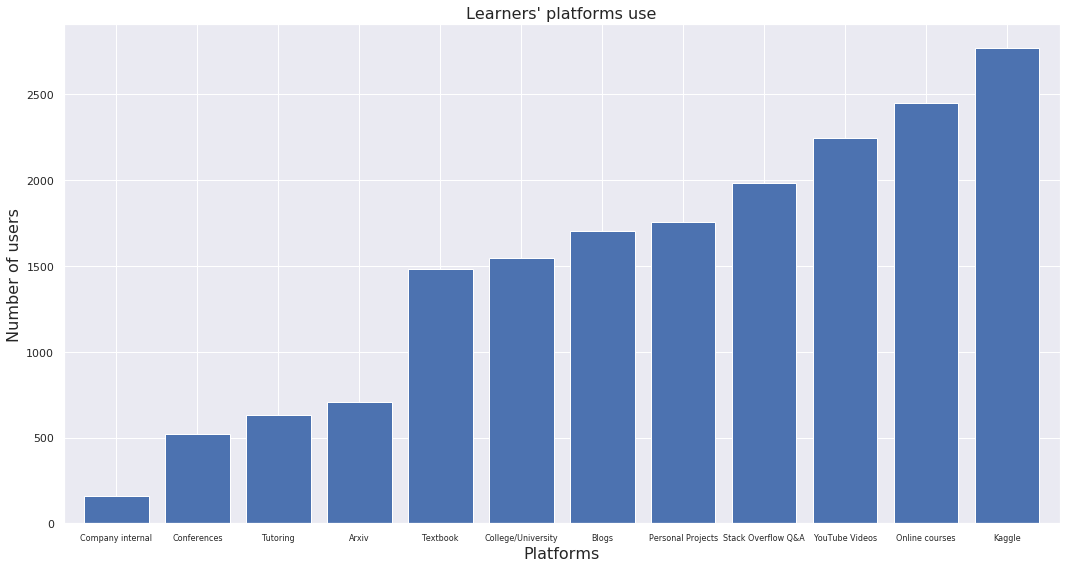

In [64]:
d_plat={}
platforms = ['College/University','Kaggle','Online courses','Arxiv','Company internal','Textbook',
             'Personal Projects','Stack Overflow Q&A','Blogs','Tutoring','Conferences','YouTube Videos']
for platform in platforms : 
    d_plat[platform]=0
    for elem in learners['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem : 
            d_plat[platform]+=1
            

s=pd.DataFrame.from_dict(data=d_plat,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar',figsize=(15,8),width=0.8,align='center')
ax.legend_.remove()
ax.set_title("Learners' platforms use",fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

Interesting!    
Kaggle and Online courses seem to be the favorite platforms for data science learners. 
At first,** I was a bit surprised when I saw that College/University comes as the 7th most used platform** but then I remembered that : 
- learners include professionals who are looking to career switch
- learners' median age is 26.

Let's check the frequency of use for younger learners (younger than 23) : 

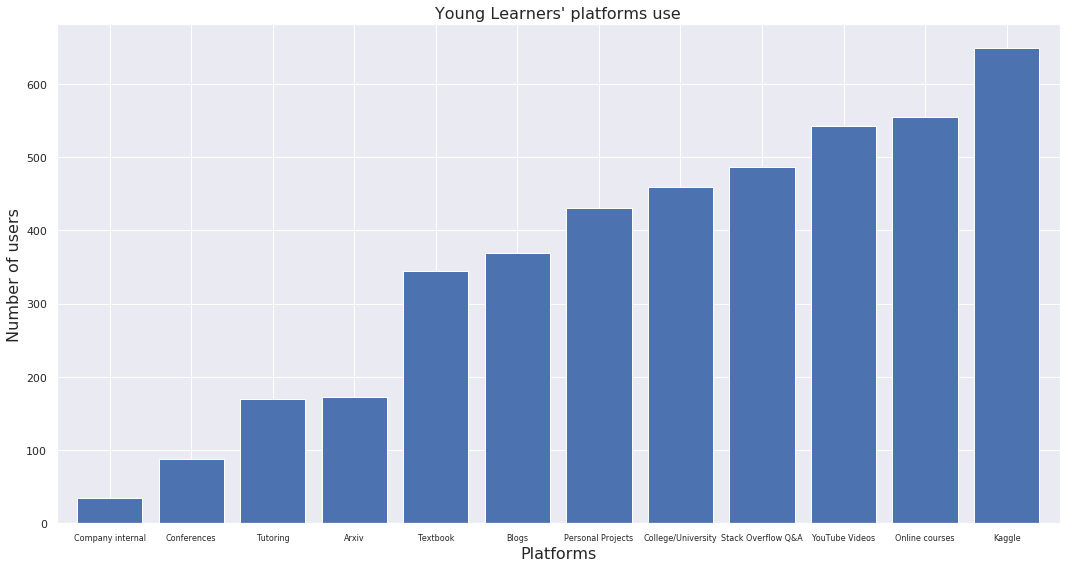

In [65]:
data_young = learners[(learners['Age']<=22) ]
d_plat2={}
for platform in platforms : 
    d_plat2[platform]=0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem : 
            d_plat2[platform]+=1

s=pd.DataFrame.from_dict(data=d_plat2,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar',figsize=(15,8),width=0.8,align='center')
ax.legend_.remove()
ax.set_title("Young Learners' platforms use",fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

Hum, there's some progress (5th instead of 7th) but nothing flagrant. Let's check young kagglers leaving in the US : 

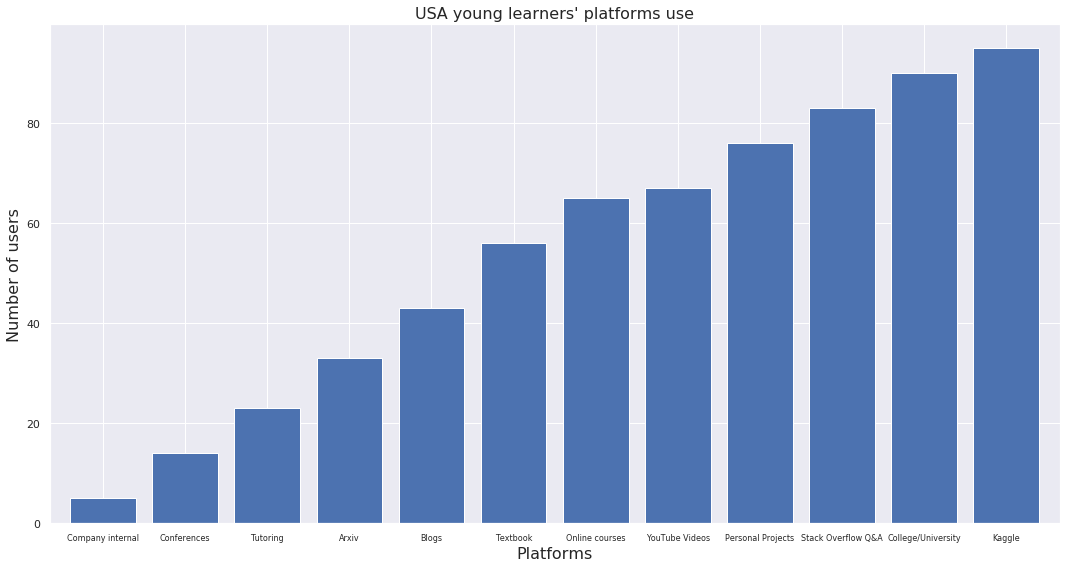

In [66]:
data_young = learners[(learners['Age']<=22) & (learners['Country']=='United States')]
d_plat2={}
for platform in platforms : 
    d_plat2[platform]=0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem : 
            d_plat2[platform]+=1


s=pd.DataFrame.from_dict(data=d_plat2,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar',figsize=(15,8),width=0.8,align='center')
ax.legend_.remove()
ax.set_title("USA young learners' platforms use",fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

**Aha ! College / University becomes the second most used platform and it isn't anymore outnumbered by Kaggle.  **

The thing is in several countries, universities didn't have and still don't have specific data science training. Often, programs are either focused on mathematics or on computer science so a student must complete his training alone. In the US, more and more universities (MIT, Columbia, Stanford...) offer specific data science masters or at least machine learning courses for students who are interested.

This is why generally, in most countries, students feel like they learn about data science a lot more outside their college.

Let's now see how useful are these same platforms for learners.

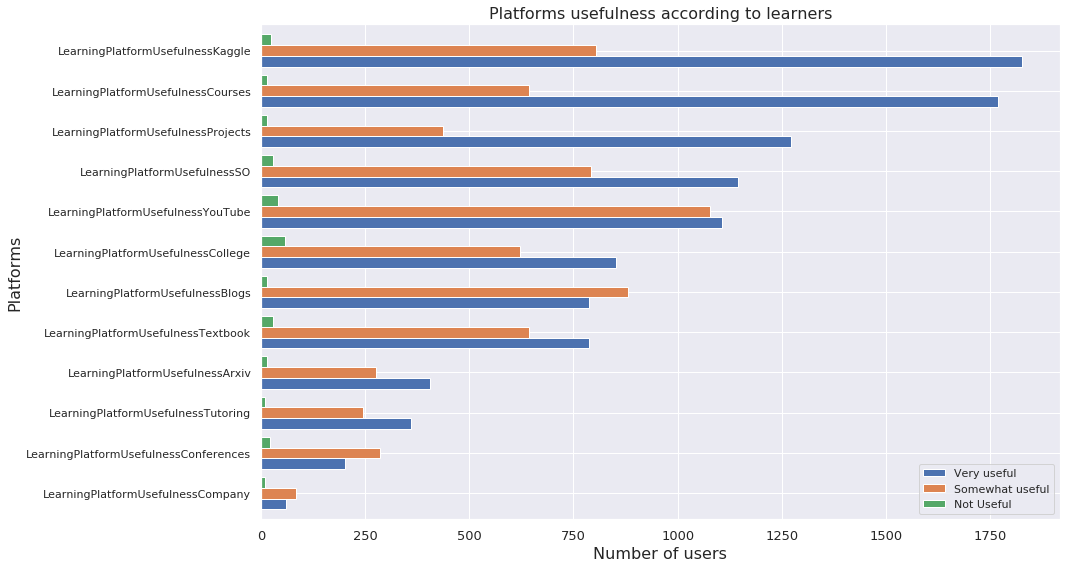

In [67]:
d_useful={}
plat_use=['LearningPlatformUsefulnessArxiv','LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege',
          'LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessConferences',
          'LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects',
          'LearningPlatformUsefulnessSO','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessTutoring',
          'LearningPlatformUsefulnessYouTube']
for plat in plat_use : 
    L=learners[plat].value_counts()
    d_useful[plat]={'Very useful':L.loc['Very useful'],
                    'Somewhat useful':L.loc['Somewhat useful'],
                    'Not Useful':L.loc['Not Useful']}

s=pd.DataFrame.from_dict(data=d_useful,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh',figsize=(15,8),width=0.8,align='center')
ax.set_title("Platforms usefulness according to learners",fontsize=16)
ax.set_ylabel("Platforms", fontsize=16)
ax.set_xlabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

We've seen that Kaggle and Coursera were the most used platforms for DS learning. We notice with this plot that they're also the platforms that are considered to be the most useful amongst learners and they're far ahead of the third most useful platform (Projects).     
We also notice that the relative usefulness of a platform is strongly related to the number of learners using that same platform. Indeed, the most used platforms are the most useful according to the last 2 plots.

Let's see which online platform is the most popular amongst data science learners.

In [68]:
d_online={}
online_plat= ['Coursera','Udacity','edX',
              'DataCamp','Other']
for plat in online_plat : 
    d_online[plat]=0
    for elem in learners['CoursePlatformSelect'].fillna('Missing'):
        if plat in elem :
            d_online[plat]+=1

online = pd.DataFrame.from_dict(d_online,orient='index')

labels = (np.array(online.index))
proportions = np.array((online[0] / online[0].sum())*100)

trace = go.Pie(labels=labels, values=proportions,
              hoverinfo='lbal+percent')

layout = go.Layout(
    title='Online Platforms popularity'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Online_plat")


ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of pie
        Received value: 'lbal+percent'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'value', 'percent', 'name'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

Coursera has a clear edge over Udacity, edX and DataCamp. This must have something to do with Andrew NG's famous course who helped introducing Machine Learning to a huge amount of people.

Let's now see what the learners are looking forward to learn next year ! 

### Method and Tool to learn next year
<a id="nextyear"></a>

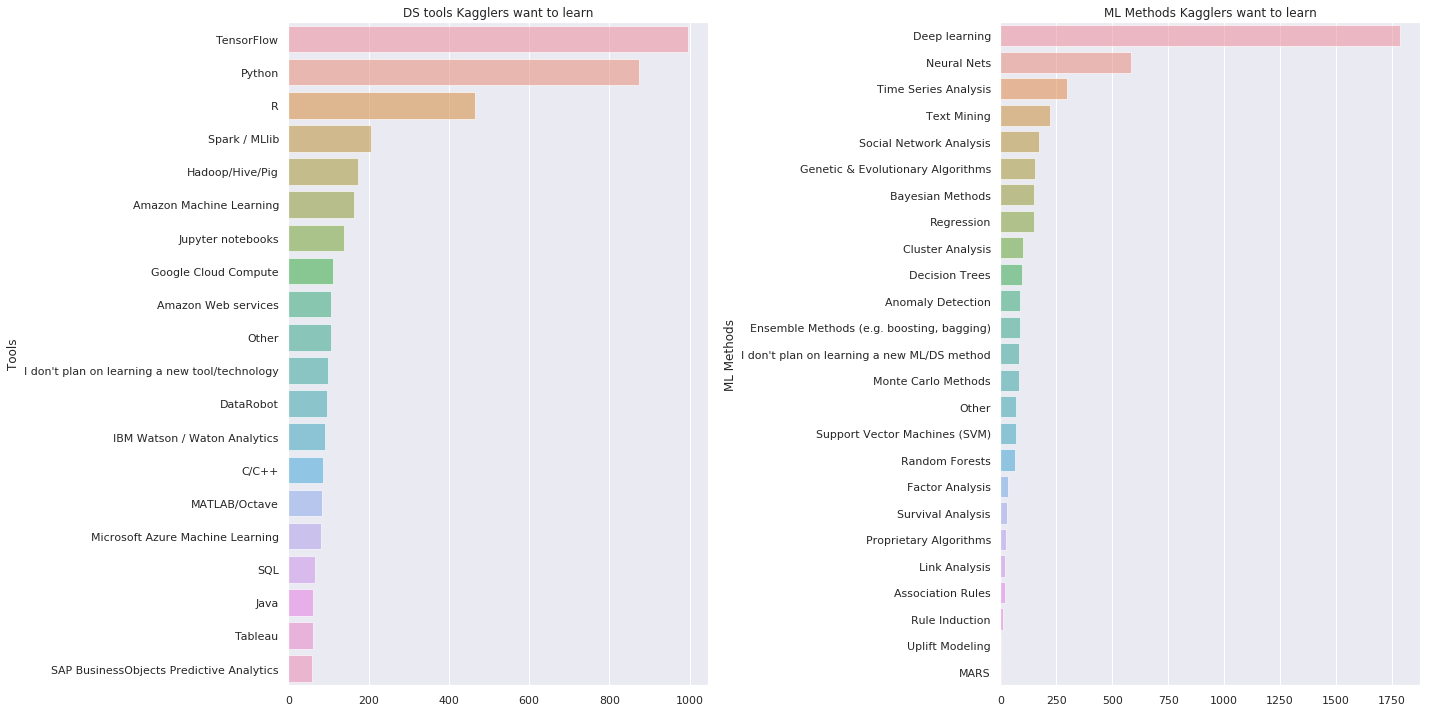

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))

tools = learners['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=tools.index, x=tools.values, alpha=0.6,ax=ax[0])
ax[0].set_title('DS tools Kagglers want to learn')
ax[0].set_xlabel('')
ax[0].set_ylabel('Tools')

methods = learners['MLMethodNextYearSelect'].value_counts()
sns.barplot(y=methods.index, x=methods.values, alpha=0.6,ax=ax[1])
ax[1].set_title('ML Methods Kagglers want to learn')
ax[1].set_xlabel('')
ax[1].set_ylabel('ML Methods')

plt.tight_layout()
plt.show()



At first, I drew the two plots separately but when I saw the results I was like no way, I'm going to put one next to the other.
The deep learning hype is real ! Methods Kagglers want to learn most are Deep Learning (I consider Neural nets to be included in Deep Learning) by a really big margin. And when we review the tools, well the results are quite the same since people want to master TensorFlow which is the most used tool for deep learning !

Let's now see how much time kagglers learners spend on DS learning on those platforms and for how many years have they been learning DS/ML.

### Time invested on DS training 
<a id="time_learning"></a>

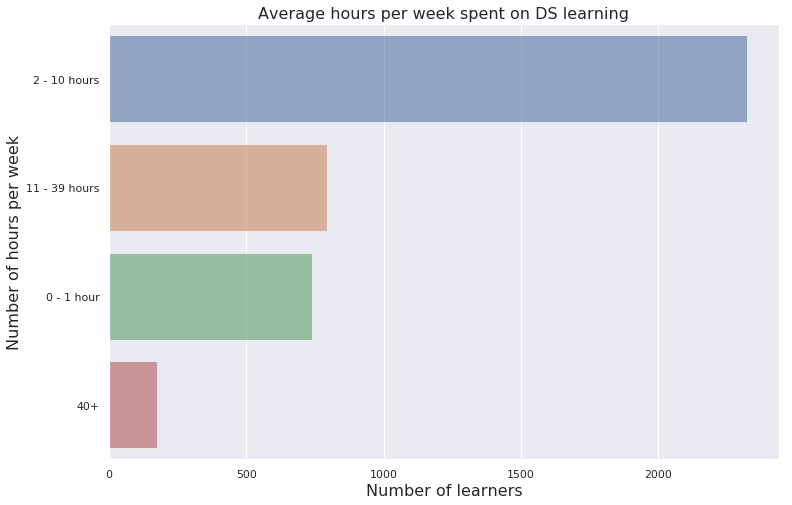

In [70]:
plt.figure(figsize=(12,8))
time = data['TimeSpentStudying'].value_counts()
sns.barplot(y=time.index, x=time.values, alpha=0.6)
plt.title("Average hours per week spent on DS learning", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Number of hours per week", fontsize=16)
plt.show();

Most learners spend between 2 and 10 hours a week learning data science, which is kind of the amount you would spend if your learning consists of one Online Course at a time.  
That being said, nearly 1000 learners (from a total of 5494) spend more than 11 hours a week. Those are probably students enrolled in data science program or learners fully dedicated to DS learning which is not the case for workers looking for a career switch who naturally have less time at their disposal to invest in DS learning.

Let's see for how many years kagglers have been learning data science.

In [71]:
start = data['LearningDataScienceTime'].value_counts()
labels = (np.array(start.index))
values = (np.array((start / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20))

layout = go.Layout(
    title='Years invested in Data Science Learning'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="nb_yers")

84.1% of learners started their DS training at most 2 years ago when only 3.5% of started more than 5 years ago !        
This shows the effect of the hype around Data Science over the last few years and also its exponential growth.

What comes next focuses on how learners perceive the professional aspect of Data Science, starting with ranking skills according to necessity and ranking proofs of DS knowledge.

### Skills and proofs of knowledge for landing a DS job 
<a id="skills_job"></a>

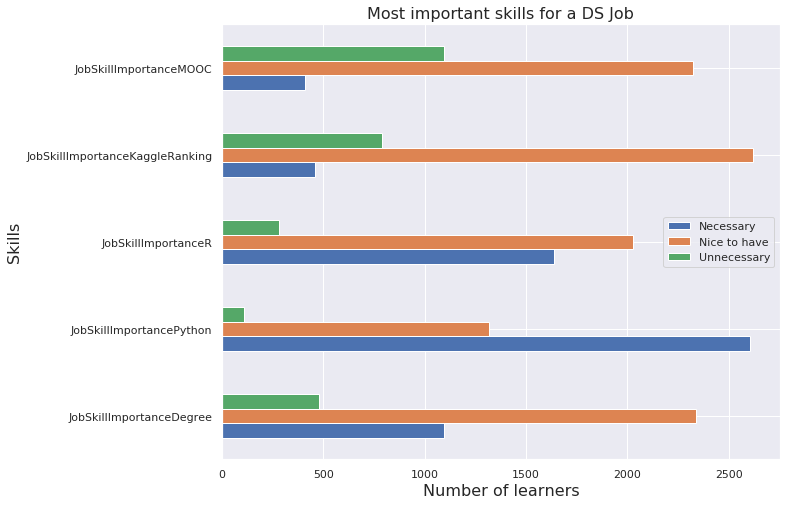

In [72]:
df2=data
d_jobskills={}
job_skills = ['JobSkillImportanceDegree','JobSkillImportancePython','JobSkillImportanceR',
              'JobSkillImportanceKaggleRanking','JobSkillImportanceMOOC']

for skill in job_skills : 
    L=df2[skill].value_counts()
    d_jobskills[skill]={'Necessary':L.loc['Necessary'],
                        'Nice to have':L.loc['Nice to have'],
                        'Unnecessary':L.loc['Unnecessary']}


(pd.DataFrame(d_jobskills)).transpose().plot(kind='barh',figsize=(10,8))
plt.title("Most important skills for a DS Job", fontsize=16)          
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Skills", fontsize=16)

plt.show();


For Data Science learners, there's no doubt, mastering Python is the most important skill for a job in Data Science ! (we could add that in our Python VS R duel).
Most learners think that a degree is more a nice asset to have than a necessary one but I'm not so sure about that. 

What about ways you can prove your knowledge of ML/DS? 


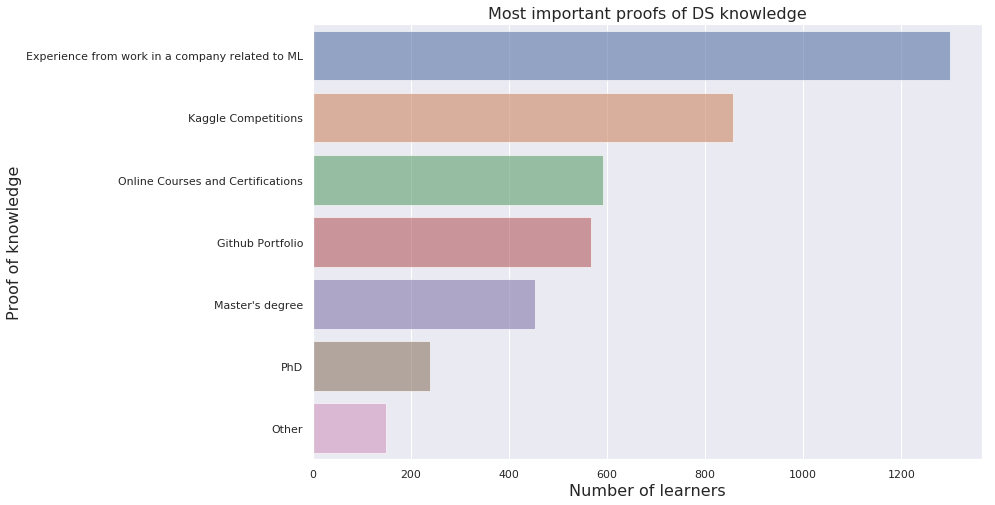

In [73]:
plt.figure(figsize=(12,8))
proof = learners['ProveKnowledgeSelect'].value_counts()
sns.barplot(y=proof.index, x=proof.values, alpha=0.6)
plt.title("Most important proofs of DS knowledge", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Proof of knowledge", fontsize=16)
plt.show();

Learners were asked *What's the most important way you can prove your knowledge of ML/DS?*. 

Master's degree and PhD aren't well ranked, that's expected since most learners consider a that a degree is not necessary to land a job in DS. That being said, I wouldn't agree with the fact than MOOCs are more important that a Master's degree and I don't think that companies value Online Courses certificates more than a Master in Mathematics / Computer science or any related field.

Prior work experience in ML comes in first position and I have agree with that. Hands-on experience is always valuable for recruiters, especially when it comes to coding stuff.


So far, we've seen how much time learn spent on perfecting their Data Science skills, we've seen the factors that they consider to be important for landing a job in DS and we've seen what's the most important way to prove ML/DS knowledge.

So when a learner is finally ready to start his DS career, what resources does he use to find a DS job ? how much time does he spent looking for a job and what are the characteristics of his dream job ? Let's answer that ! 

### Learners' job hunt 
<a id="job_hunt"></a>

In [74]:
job_s = learners['JobSearchResource'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=False)

layout = go.Layout(
    title='Most used resources for finding a DS job'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Job_resource")

So the top-3 resources according to learners are :
1. Companies' job listing pages,
2. Tech-Specific job boards (Stack Overflow recruitment platform for example)
3. General job boards (LinkedIn)

Now to the time spent looking for a job.

In [75]:
job_s = learners['JobHuntTime'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(title='Hours per week spent  looking for a data science job?'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Job_resource")

* 40.2% of learners aren't actually looking for a job. Let's not forget that some are still enrolled in College/University and others (workers who answered 'yes' for career switch) may be looking to switch position within the company they work for.   
* 34.5% spend an hour or two a week looking for a job, which means that there's no urge to look for a job. It may be students looking for internships or employed people checking from time to time if an exciting opportunity is out there somewhere.
* A little more than 10% are actively working for a job, spending at least 6 hours per week job hunting.

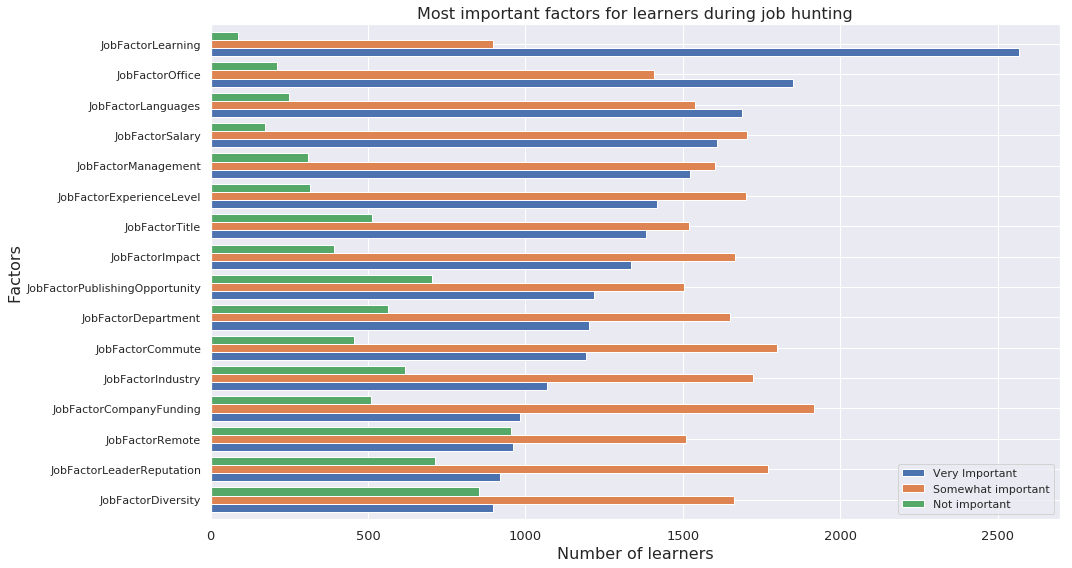

In [76]:
d_criterias={}
criterias_job=['JobFactorLearning','JobFactorSalary','JobFactorOffice','JobFactorLanguages',
               'JobFactorCommute','JobFactorManagement','JobFactorExperienceLevel',
               'JobFactorDepartment','JobFactorTitle','JobFactorCompanyFunding','JobFactorImpact',
               'JobFactorRemote','JobFactorIndustry','JobFactorLeaderReputation','JobFactorDiversity',
               'JobFactorPublishingOpportunity']
for criteria in criterias_job : 
    L=df2[criteria].value_counts()
    d_criterias[criteria]={'Very Important':L.loc['Very Important'],
                           'Somewhat important':L.loc['Somewhat important'],
                           'Not important':L.loc['Not important']}
    
s=pd.DataFrame.from_dict(data=d_criterias,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh',figsize=(15,8),width=0.8,align='center')
ax.set_title("Most important factors for learners during job hunting",fontsize=16)
ax.set_ylabel("Factors", fontsize=16)
ax.set_xlabel("Number of learners", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

**In this plot, the factors are ordered according to the criteria 'Most Important'.**

1. DS learners are constantly striving for development ! The most important factor during their job hunt, by far, is whether the job would hand them opportunities of professional development.   
2. The second most important factor is the office environment they would be working in.    
3. The third one is the programming languages and frameworks they'd be working with. That shows that data scientist aren't really open to work with whatever technology the company is using, they have strong preferences that are crucial for chosing one job over another.  
4. The salary comes fourth and is close to other factors so it doesn't seem to be too problematic for aspiring data scientists, maybe that's because they're already quite assured that the salary would be great !

## Conclusion 
<a id="conclusion"></a>
***

Unfortunately, every story eventually comes to an end and looks like we're at the end of this one too :'(

Through this EDA kernel I did my best to achieve three things : 
1. Dig as deep as I can in this survey's results to expose interesting insights that could give anyone a better understanding about the Data Science world as it is in 2017, be it from a worker point of view or a learner's one.
2. Expose various data analysis / visualization tools for data science beginners who read this notebook (such as plotly library, seaborn, matplotlib, Tableau and MCA technique for dimensionality reduction when dealing with categorical variables) providing references and link to tutorials when possible.
3. Create a basic classification problem from the dataset and solve it with the most simple machine learning model : logistic regression then show the usual metrics we use in those problems : accuracy, precision, recall and auc/roc score.

### As for the key takeaways of this Kernel : 

**On the analysis side : **
* The gender gap in Kaggle users is huge unfortunately , at least for the moment ! Most of Kagglers are either master's or bachelor's graduates who had CS as a major and are now employed full-time.
* For narrative reasons, my second section was named 'Python Vs R : Let the battle begin' and I painted that as an epic confrontation. The truth is, as Mr @gmobaz wisely pointed out in the comment section, there's no fight and no clear winner. It's more about understanding the synergy between both languages, how the complement each other and where each one seems to perform best. Personnaly, I'm a Python user but when I first discovered MCA, I found more performing libraries on R than on Python and that often happens for statistic tools, and that's what's beautiful about R and Python : knowing how to use both of them really makes one able to use some techniques a lot more efficiently. In fact, if you recall in the methods plot for example, we said that 'Both' users were having the best of both worlds.
* Learners' favourite platform for learning is ... Kaggle ! They can't wait to learn more about Neural Networks and Tensorflow, they firmly believe that the future of deep learning is bright (and they're probably right :) ). They devote around 8-10 hours a week to their Data science training and when looking for work, the most important criteria for them is how much they can improve professionaly.

**On the technical side : **
* When you want to measure correlation between two categorical variables, chi2-test is a good start. For python users, scipy.stats has all statistic tests you could need.
* When you conduct a study about income, make sure not to merge all countries together as that could lead to biased and generally false results.
* PCA has a less known version of itself very well suited to dealing with categorical variables, it can produce really beautiful plots.
* We don't always need very sophisticated models to get good enough results in Machine Learning, instead, we need to carefully choose the features we're going to use, the parameters for the models etc ... A logistic regression can take you a long way if you use it carefully. Well, if you see again the methods / algorithms plot per language programming, you'll notice that logistic regression is always the most used technique :)
* Accuracy can be misleading in classification problems, especially when dealing with imbalanced datasets, don't forget about precision and recall ! 


Well, it seems like everything that needs to be said has been said ! 

I really hope that anyone that comes across this kernel ends up learning something new either on the analysis part, the technical one or even both of them !

I'm open to any suggestions and would love to get some feedback so don't hesitate to contact me or put something on the comment section.

Thank you for your time !

## **Please upvote if you liked the kernel, that would be very encouraging :).**
